In [1]:
import numpy as np
import pickle
import os
import tensorflow as tf
import download
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
#from dataset import one_hot_encoded

In [2]:
data_path = "/Users/DEEPAK/Desktop/FALL 2018/EE-258/Project_A_CIFAR-10/cifar-10-python.tar/cifar-10-python"

In [3]:
def get_filenames(data_path):
    filenames = [os.path.join(data_path, 'cifar-10-batches-py', 'data_batch_%d' % i)
    for i in range(1, 6)]
    return filenames

def get_classname(filename=""):
    """
    Return the full path of a data-file for the data-set.

    If filename=="" then return the directory of the files.
    """

    return os.path.join(data_path, "cifar-10-batches-py/", filename)


def get_testfile(data_path):
    testfile = [os.path.join(data_path, 'cifar-10-batches-py', 'test_batch')]
    return testfile
    

                             
def _unpickle(filename):
    """
    Unpickle the given file and return the data.

    Note that the appropriate dir-name is prepended the filename.
    """

    # Create full path for the file.
    file_path = get_classname(filename)

    print("Loading data: " + file_path)

    with open(file_path, mode='rb') as file:
        # In Python 3.X it is important to set the encoding,
        # otherwise an exception is raised here.
        data = pickle.load(file, encoding='bytes')

    return data

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
        data = dict[b'data']
        label = dict[b'labels']
    return dict

In [4]:
def load_class_names():
    """
    Load the names for the classes in the CIFAR-10 data-set.

    Returns a list with the names. Example: names[3] is the name
    associated with class-number 3.
    """

    # Load the class-names from the pickled file.
    raw = _unpickle(filename="batches.meta")[b'label_names']

    # Convert from binary strings.
    names = [x.decode('utf-8') for x in raw]

    return names

In [5]:
load_class_names()

Loading data: /Users/DEEPAK/Desktop/FALL 2018/EE-258/Project_A_CIFAR-10/cifar-10-python.tar/cifar-10-python\cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [6]:
all_labels = []
all_data = []
test_labels = []
test_data = []
num_batch_images = 10000
channels = 3
width = 32
height = 32

In [7]:
for filename in get_filenames('/Users/DEEPAK/Desktop/FALL 2018/EE-258/Project_A_CIFAR-10/cifar-10-python.tar/cifar-10-python'):
    batch_dict = unpickle(filename)
    all_labels.extend(batch_dict[b'labels'])
    all_data.extend(np.reshape(batch_dict[b'data'], (num_batch_images, channels,width,height)))
    
    
for testfile in get_testfile('/Users/DEEPAK/Desktop/FALL 2018/EE-258/Project_A_CIFAR-10/cifar-10-python.tar/cifar-10-python'):
    test_dict = unpickle(filename)
    test_labels.extend(batch_dict[b'labels'])
    test_data.extend(np.reshape(batch_dict[b'data'], (num_batch_images, channels,width,height)))    

In [8]:
train_X = np.asarray(all_data)
train_Y = np.asarray(all_labels)

test_X = np.asarray(test_data)
test_Y = np.asarray(test_labels)

In [9]:
print("Shape of training data:")
print(train_X.shape)
print(train_Y.shape)
print("Shape of test data:")
print(test_X.shape)
print(test_Y.shape)

Shape of training data:
(50000, 3, 32, 32)
(50000,)
Shape of test data:
(10000, 3, 32, 32)
(10000,)


(32, 32, 3)


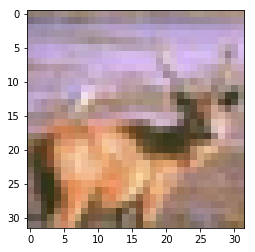

In [10]:
oneimage = all_data[9000].transpose(1, 2, 0)
print(oneimage.shape)
plt.imshow(oneimage)

In [11]:
train_X = np.reshape(train_X,(50000,3072))
test_X = np.reshape(test_X,(10000,3072))
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

# Normalization of pixel values (to [0-1] range)

train_X /= 255
test_X /= 255

In [12]:
print("Shape of training data:")
print(train_X.shape)
print(train_Y.shape)
print("Shape of test data:")
print(test_X.shape)
print(test_Y.shape)

Shape of training data:
(50000, 3072)
(50000,)
Shape of test data:
(10000, 3072)
(10000,)


In [13]:
train_X.shape

(50000, 3072)

In [14]:
train_Y.shape

(50000,)

In [15]:
import numpy as np
shuffle_index = np.random.permutation(50000)
train_Xs, train_Ys = train_X[shuffle_index], train_Y[shuffle_index]

In [16]:
digit_train, counts_train = np.unique(train_Y, return_counts = True)

distribution_train = dict(zip(digit_train, counts_train))
print(distribution_train )

{0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}


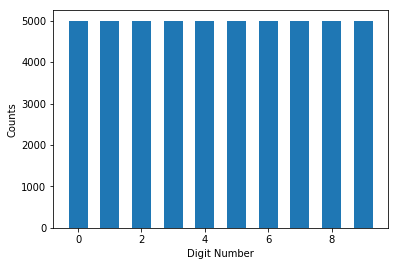

In [17]:
plt.bar(list(distribution_train.keys()),distribution_train.values(),width =0.6)
plt.xlabel('Digit Number')
plt.ylabel('Counts')
plt.show()

In [18]:
digit_test, counts_test = np.unique(test_Y, return_counts = True)

distribution_test = dict(zip(digit_test, counts_test))
print(distribution_test)

{0: 1014, 1: 1014, 2: 952, 3: 1016, 4: 997, 5: 1025, 6: 980, 7: 977, 8: 1003, 9: 1022}


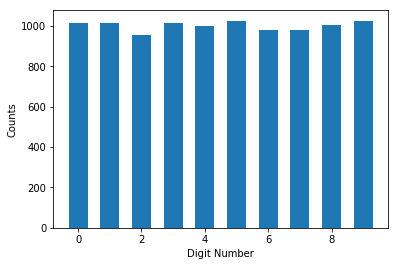

In [19]:
plt.bar(list(distribution_test.keys()),distribution_test.values(),width =0.6)
plt.xlabel('Digit Number')
plt.ylabel('Counts')
plt.show()

In [20]:
_train_X, X_val, _train_Y, y_val  = train_test_split(train_Xs, train_Ys, test_size = 1/10, random_state = 42)

In [21]:
print(_train_X.shape, X_val.shape)
print(_train_Y, y_val)

(45000, 3072) (5000, 3072)
[5 7 3 ... 5 7 7] [8 5 3 ... 1 8 1]


In [ ]:
config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
# set the random seed for tensorflow initializers(for consistency between reruns)

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(train_X)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[3072], n_classes=10, feature_columns=feature_columns, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # to be compatible with sklearn
dnn_clf.fit(train_X, train_Y, batch_size=450, steps=1000)

Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please convert numpy dtypes explicitly.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001F0415BCFD0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation

In [23]:
y_pred = dnn_clf.predict(X_val)
print(y_pred.keys())
accuracy_score(y_val, y_pred['classes'])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local\Temp\tmp9ndj_tk2\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
dict_keys(['logits', 'probabilities', 'classes'])


0.3866

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_X.astype(np.float32))
X_val_scaled = scaler.fit_transform(X_val.astype(np.float32))
X_test_scaled = scaler.fit_transform(test_X.astype(np.float32))

In [27]:
config = tf.contrib.learn.RunConfig(tf_random_seed=42)
# set the random seed for tensorflow initializers(for consistency between reruns)

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[3072], n_classes=10,
                                         feature_columns=feature_columns, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # to be compatible with sklearn
dnn_clf.fit(X_train_scaled, train_Y, batch_size=64, steps=1000)

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E2ADF94048>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\DEEPAK\\AppData\\Local\\Temp\\tmpw95fjs6q'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DEEPAK\App

SKCompat()

In [28]:
y_pred = dnn_clf.predict(X_val_scaled)
accuracy_score(y_val, y_pred['classes'])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local\Temp\tmpw95fjs6q\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.4438

In [30]:
#learning curve

Train_size_list_1ep = []
Train_error_list_1ep = []
Val_error_list_1ep = []
Train_time_list_1ep = []
Val_time_list_1ep = []

from sklearn.model_selection import train_test_split

for j in [ 0.999, 0.995, 0.99,0.985,0.98, 0.975,0.97, 0.96,0.95, 0.94, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.2, 0.1, 0.001, 0]:

    X_train_scaled_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(X_train_scaled, train_Y, test_size = j, random_state = 42)
    print('Train_set_size:', y_train_partial.shape[0])
    Train_size_list_1ep.append(y_train_partial.shape[0])
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled_partial)
    
    dnn_1_clf = tf.contrib.learn.DNNClassifier(hidden_units=[3072], n_classes=10, feature_columns=feature_columns, config=config)
    dnn_1_clf = tf.contrib.learn.SKCompat(dnn_1_clf) #### to be compatible with sklearn
    
    
    start=datetime.now()
    dnn_1_clf.fit(X_train_scaled_partial, y_train_partial, batch_size=64, steps=((1-j)*1100) )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf training time', Train_elapse)
    Train_time_list_1ep.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf.predict(X_train_scaled_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

    
    print(type(y_train_partial_pred))
    
    

   
    start=datetime.now()
    y_val_pred =  dnn_1_clf.predict(X_val_scaled)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    
    Val_time_list_1ep.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
      
    
    print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
    Train_error_list_1ep.append(Train_error)
    Val_error_list_1ep.append(Val_error)
    
print("Train_size_list: ", Train_size_list_1ep)
print("Train_error_list: ", Train_error_list_1ep)
print("Val_error_list: ", Val_error_list_1ep)
print("Train_time_list: ", Train_time_list_1ep)
print("Val_time_list: ", Val_time_list_1ep)   

Train_set_size: 50
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E2C04B9F98>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\DEEPAK\\AppData\\Local\\Temp\\tmpgb4dknds'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into 

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DEEPAK\AppData\Local\Temp\tmply2s5rpb\model.ckpt.
INFO:tensorflow:loss = 2.795199, step = 1
INFO:tensorflow:Saving checkpoints for 23 into C:\Users\DEEPAK\AppData\Local\Temp\tmply2s5rpb\model.ckpt.
INFO:tensorflow:Loss for final step: 7.418439.
dnn_1_clf training time 4.500992
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local\Temp\tmply2s5rpb\model.ckpt-23
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local\Temp\tmply2s5rpb\model.ckpt-23
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.661 / 0.784799999

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local\Temp\tmpgy6pzott\model.ckpt-56
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.6616 / 0.7402
Train_set_size: 3000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E2C0281908>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local\Temp\tmpgheg485c\model.ckpt-331
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.5876666666666667 / 0.6337999999999999
Train_set_size: 20000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E2C0638E80>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config':

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DEEPAK\AppData\Local\Temp\tmptgdy63z0\model.ckpt.
INFO:tensorflow:loss = 2.8712559, step = 1
INFO:tensorflow:global_step/sec: 14.7446
INFO:tensorflow:loss = 2.4351645, step = 101 (6.783 sec)
INFO:tensorflow:global_step/sec: 14.8368
INFO:tensorflow:loss = 2.2689028, step = 201 (6.742 sec)
INFO:tensorflow:global_step/sec: 14.8205
INFO:tensorflow:loss = 2.0922852, step = 301 (6.745 sec)
INFO:tensorflow:global_step/sec: 14.8307
INFO:tensorflow:loss = 1.9977916, step = 401 (6.747 sec)
INFO:tensorflow:global_step/sec: 14.8873
INFO:tensorflow:loss = 1.8072436, step = 501 (6.714 sec)
INFO:tensorflow:global_step/sec: 14.8347
INFO:tensorflow:loss = 1.7893666, step = 601 (6.740 sec)
INFO:tensorflow:global_step/sec: 14.8753
INFO:tensorflow:loss = 1.5199726, step = 701 (6.727 sec)
IN

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DEEPAK\AppData\Local\Temp\tmp6b_jethq\model.ckpt.
INFO:tensorflow:loss = 2.54281, step = 1
INFO:tensorflow:global_step/sec: 14.7459
INFO:tensorflow:loss = 2.2140486, step = 101 (6.785 sec)
INFO:tensorflow:global_step/sec: 14.8706
INFO:tensorflow:loss = 1.6064411, step = 201 (6.726 sec)
INFO:tensorflow:global_step/sec: 14.8585
INFO:tensorflow:loss = 1.540766, step = 301 (6.730 sec)
INFO:tensorflow:global_step/sec: 14.8944
INFO:tensorflow:loss = 1.7489599, step = 401 (6.713 sec)
INFO:tensorflow:global_step/sec: 14.8422
INFO:tensorflow:loss = 2.2450695, step = 501 (6.738 sec)
INFO:tensorflow:global_step/sec: 14.8447
INFO:tensorflow:loss = 1.8362952, step = 601 (6.733 sec)
INFO:tensorflow:global_step/sec: 14.8809
INFO:tensorflow:loss = 1.7082685, step = 701 (6.723 sec)
INFO:

In [31]:
#learning curve

Train_size_list_5ep = []
Train_error_list_5ep = []
Val_error_list_5ep = []
Train_time_list_5ep = []
Val_time_list_5ep = []

from sklearn.model_selection import train_test_split

for j in [ 0.999, 0.995, 0.99,0.985,0.98, 0.975,0.97, 0.96,0.95, 0.94, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.2, 0.1, 0.001, 0]:

    X_train_scaled_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(X_train_scaled, train_Y, test_size = j, random_state = 42)
    print('Train_set_size:', y_train_partial.shape[0])
    Train_size_list_5ep.append(y_train_partial.shape[0])
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled_partial)
    
    dnn_1_clf = tf.contrib.learn.DNNClassifier(hidden_units=[3072], n_classes=10, feature_columns=feature_columns, config=config)
    dnn_1_clf = tf.contrib.learn.SKCompat(dnn_1_clf) #### to be compatible with sklearn
    
    
    start=datetime.now()
    dnn_1_clf.fit(X_train_scaled_partial, y_train_partial, batch_size=64, steps=((1-j)*1100*5) )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf training time', Train_elapse)
    Train_time_list_5ep.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf.predict(X_train_scaled_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

    
    print(type(y_train_partial_pred))
    
    

   
    start=datetime.now()
    y_val_pred =  dnn_1_clf.predict(X_val_scaled)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    
    Val_time_list_5ep.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
      
    
    print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
    Train_error_list_5ep.append(Train_error)
    Val_error_list_5ep.append(Val_error)
    
print("Train_size_list: ", Train_size_list_5ep)
print("Train_error_list: ", Train_error_list_5ep)
print("Val_error_list: ", Val_error_list_5ep)
print("Train_time_list: ", Train_time_list_5ep)
print("Val_time_list: ", Val_time_list_5ep)   

Train_set_size: 50
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E2C09262E8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\DEEPAK\\AppData\\Local\\Temp\\tmp0ov4e_jf'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into 

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DEEPAK\AppData\Local\Temp\tmp5xg8b4t8\model.ckpt.
INFO:tensorflow:loss = 2.795199, step = 1
INFO:tensorflow:global_step/sec: 14.9422
INFO:tensorflow:loss = 0.5485116, step = 101 (6.698 sec)
INFO:tensorflow:Saving checkpoints for 111 into C:\Users\DEEPAK\AppData\Local\Temp\tmp5xg8b4t8\model.ckpt.
INFO:tensorflow:Loss for final step: 0.27266258.
dnn_1_clf training time 10.137185
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local\Temp\tmp5xg8b4t8\model.ckpt-111
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local\Temp\tmp5xg8b4t8\model.ckpt-111
INFO:tensorflow:Runni

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DEEPAK\AppData\Local\Temp\tmp3tr_e7cb\model.ckpt.
INFO:tensorflow:loss = 2.6460443, step = 1
INFO:tensorflow:global_step/sec: 14.7977
INFO:tensorflow:loss = 2.6771433, step = 101 (6.758 sec)
INFO:tensorflow:global_step/sec: 14.8859
INFO:tensorflow:loss = 3.6404672, step = 201 (6.723 sec)
INFO:tensorflow:Saving checkpoints for 276 into C:\Users\DEEPAK\AppData\Local\Temp\tmp3tr_e7cb\model.ckpt.
INFO:tensorflow:Loss for final step: 1.3599306.
dnn_1_clf training time 21.266768
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local\Temp\tmp3tr_e7cb\model.ckpt-276
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local\Temp\tmpiovuch9v\model.ckpt-1100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.4101 / 0.5873999999999999
Train_set_size: 15000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E2AE6173C8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_sa

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DEEPAK\AppData\Local\Temp\tmpnf5ie1s2\model.ckpt.
INFO:tensorflow:loss = 2.828029, step = 1
INFO:tensorflow:global_step/sec: 14.6686
INFO:tensorflow:loss = 2.113327, step = 101 (6.822 sec)
INFO:tensorflow:global_step/sec: 14.7772
INFO:tensorflow:loss = 2.3343444, step = 201 (6.763 sec)
INFO:tensorflow:global_step/sec: 14.8305
INFO:tensorflow:loss = 2.1280918, step = 301 (6.743 sec)
INFO:tensorflow:global_step/sec: 14.9511
INFO:tensorflow:loss = 1.7234306, step = 401 (6.692 sec)
INFO:tensorflow:global_step/sec: 14.7592
INFO:tensorflow:loss = 1.4323776, step = 501 (6.776 sec)
INFO:tensorflow:global_step/sec: 14.7959
INFO:tensorflow:loss = 1.9377949, step = 601 (6.756 sec)
INFO:tensorflow:global_step/sec: 14.8375
INFO:tensorflow:loss = 1.7609204, step = 701 (6.737 sec)
INFO

dnn_1_clf training time 226.678634
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local\Temp\tmpyzstb38e\model.ckpt-3300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local\Temp\tmpyzstb38e\model.ckpt-3300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.31420000000000003 / 0.385
Train_set_size: 40000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E2ADE4F198>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_f

INFO:tensorflow:global_step/sec: 14.7333
INFO:tensorflow:loss = 1.7036428, step = 401 (6.787 sec)
INFO:tensorflow:global_step/sec: 14.7505
INFO:tensorflow:loss = 1.9775712, step = 501 (6.780 sec)
INFO:tensorflow:global_step/sec: 14.7991
INFO:tensorflow:loss = 1.7191697, step = 601 (6.756 sec)
INFO:tensorflow:global_step/sec: 14.8354
INFO:tensorflow:loss = 1.7906579, step = 701 (6.741 sec)
INFO:tensorflow:global_step/sec: 14.8772
INFO:tensorflow:loss = 1.6561224, step = 801 (6.722 sec)
INFO:tensorflow:global_step/sec: 14.7818
INFO:tensorflow:loss = 1.3422103, step = 901 (6.765 sec)
INFO:tensorflow:global_step/sec: 14.7929
INFO:tensorflow:loss = 1.9090476, step = 1001 (6.758 sec)
INFO:tensorflow:global_step/sec: 14.7878
INFO:tensorflow:loss = 1.5793084, step = 1101 (6.763 sec)
INFO:tensorflow:global_step/sec: 14.8159
INFO:tensorflow:loss = 1.4875376, step = 1201 (6.747 sec)
INFO:tensorflow:global_step/sec: 14.7647
INFO:tensorflow:loss = 1.5699126, step = 1301 (6.773 sec)
INFO:tensorflow:

INFO:tensorflow:global_step/sec: 14.7446
INFO:tensorflow:loss = 1.1776037, step = 1901 (6.782 sec)
INFO:tensorflow:global_step/sec: 14.7042
INFO:tensorflow:loss = 1.7022939, step = 2001 (6.802 sec)
INFO:tensorflow:global_step/sec: 14.8693
INFO:tensorflow:loss = 1.5340648, step = 2101 (6.721 sec)
INFO:tensorflow:global_step/sec: 14.8533
INFO:tensorflow:loss = 2.0486395, step = 2201 (6.734 sec)
INFO:tensorflow:global_step/sec: 14.6816
INFO:tensorflow:loss = 1.5257878, step = 2301 (6.808 sec)
INFO:tensorflow:global_step/sec: 14.5577
INFO:tensorflow:loss = 1.1530745, step = 2401 (6.872 sec)
INFO:tensorflow:global_step/sec: 14.5976
INFO:tensorflow:loss = 1.4354687, step = 2501 (6.850 sec)
INFO:tensorflow:global_step/sec: 14.6969
INFO:tensorflow:loss = 1.546083, step = 2601 (6.803 sec)
INFO:tensorflow:global_step/sec: 14.7966
INFO:tensorflow:loss = 1.2562553, step = 2701 (6.758 sec)
INFO:tensorflow:global_step/sec: 15.8314
INFO:tensorflow:loss = 1.4393764, step = 2801 (6.317 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 12.8665
INFO:tensorflow:loss = 1.395282, step = 2901 (7.771 sec)
INFO:tensorflow:global_step/sec: 12.7063
INFO:tensorflow:loss = 1.2007432, step = 3001 (7.870 sec)
INFO:tensorflow:global_step/sec: 12.8091
INFO:tensorflow:loss = 1.5299966, step = 3101 (7.807 sec)
INFO:tensorflow:global_step/sec: 12.5292
INFO:tensorflow:loss = 1.2235972, step = 3201 (7.986 sec)
INFO:tensorflow:global_step/sec: 12.3334
INFO:tensorflow:loss = 1.3337626, step = 3301 (8.103 sec)
INFO:tensorflow:global_step/sec: 11.3829
INFO:tensorflow:loss = 1.1766326, step = 3401 (8.785 sec)
INFO:tensorflow:global_step/sec: 11.819
INFO:tensorflow:loss = 1.2067451, step = 3501 (8.461 sec)
INFO:tensorflow:global_step/sec: 12.1028
INFO:tensorflow:loss = 1.2003781, step = 3601 (8.263 sec)
INFO:tensorflow:global_step/sec: 12.3536
INFO:tensorflow:loss = 1.2080369, step = 3701 (8.095 sec)
INFO:tensorflow:global_step/sec: 12.7857
INFO:tensorflow:loss = 0.9658128, step = 3801 (7.821 sec)
INFO:tensorf

In [32]:
#learning curve

Train_size_list_10ep = []
Train_error_list_10ep = []
Val_error_list_10ep = []
Train_time_list_10ep = []
Val_time_list_10ep = []

from sklearn.model_selection import train_test_split

for j in [ 0.999, 0.995, 0.99,0.985,0.98, 0.975,0.97, 0.96,0.95, 0.94, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.2, 0.1, 0.001, 0]:

    X_train_scaled_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(X_train_scaled, train_Y, test_size = j, random_state = 42)
    print('Train_set_size:', y_train_partial.shape[0])
    Train_size_list_10ep.append(y_train_partial.shape[0])
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled_partial)
    
    dnn_1_clf = tf.contrib.learn.DNNClassifier(hidden_units=[3072], n_classes=10, feature_columns=feature_columns, config=config)
    dnn_1_clf = tf.contrib.learn.SKCompat(dnn_1_clf) #### to be compatible with sklearn
    
    
    start=datetime.now()
    dnn_1_clf.fit(X_train_scaled_partial, y_train_partial, batch_size=64, steps=((1-j)*1100*10) )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf training time', Train_elapse)
    Train_time_list_10ep.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf.predict(X_train_scaled_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

    
    print(type(y_train_partial_pred))
    
    

   
    start=datetime.now()
    y_val_pred =  dnn_1_clf.predict(X_val_scaled)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    
    Val_time_list_10ep.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
      
    
    print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
    Train_error_list_10ep.append(Train_error)
    Val_error_list_10ep.append(Val_error)
    
print("Train_size_list: ", Train_size_list_10ep)
print("Train_error_list: ", Train_error_list_10ep)
print("Val_error_list: ", Val_error_list_10ep)
print("Train_time_list: ", Train_time_list_10ep)
print("Val_time_list: ", Val_time_list_10ep)   

Train_set_size: 50
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E2C013EF98>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\DEEPAK\\AppData\\Local\\Temp\\tmpcw9aj5xz'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into 

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DEEPAK\AppData\Local\Temp\tmp4k0eo31y\model.ckpt.
INFO:tensorflow:loss = 2.795199, step = 1
INFO:tensorflow:global_step/sec: 16.417
INFO:tensorflow:loss = 0.5485116, step = 101 (6.094 sec)
INFO:tensorflow:global_step/sec: 17.8951
INFO:tensorflow:loss = 0.028211184, step = 201 (5.588 sec)
INFO:tensorflow:Saving checkpoints for 221 into C:\Users\DEEPAK\AppData\Local\Temp\tmp4k0eo31y\model.ckpt.
INFO:tensorflow:Loss for final step: 0.025953684.
dnn_1_clf training time 14.677776
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local\Temp\tmp4k0eo31y\model.ckpt-221
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DEEPAK\AppData\Local\Temp\tmpan880h4y\model.ckpt.
INFO:tensorflow:loss = 2.6460443, step = 1
INFO:tensorflow:global_step/sec: 17.8536
INFO:tensorflow:loss = 2.6771433, step = 101 (5.606 sec)
INFO:tensorflow:global_step/sec: 17.4535
INFO:tensorflow:loss = 3.6404672, step = 201 (5.727 sec)
INFO:tensorflow:global_step/sec: 18.7787
INFO:tensorflow:loss = 1.115505, step = 301 (5.324 sec)
INFO:tensorflow:global_step/sec: 19.0878
INFO:tensorflow:loss = 1.9818647, step = 401 (5.240 sec)
INFO:tensorflow:global_step/sec: 18.7543
INFO:tensorflow:loss = 0.2525498, step = 501 (5.332 sec)
INFO:tensorflow:Saving checkpoints for 551 into C:\Users\DEEPAK\AppData\Local\Temp\tmpan880h4y\model.ckpt.
INFO:tensorflow:Loss for final step: 0.27257267.
dnn_1_clf training time 31.617977
INFO:tens

INFO:tensorflow:global_step/sec: 18.9267
INFO:tensorflow:loss = 1.6497, step = 201 (5.284 sec)
INFO:tensorflow:global_step/sec: 18.6071
INFO:tensorflow:loss = 2.2120209, step = 301 (5.374 sec)
INFO:tensorflow:global_step/sec: 18.882
INFO:tensorflow:loss = 1.6371807, step = 401 (5.296 sec)
INFO:tensorflow:global_step/sec: 18.6207
INFO:tensorflow:loss = 1.2837577, step = 501 (5.370 sec)
INFO:tensorflow:global_step/sec: 19.1178
INFO:tensorflow:loss = 1.5126243, step = 601 (5.232 sec)
INFO:tensorflow:global_step/sec: 18.6254
INFO:tensorflow:loss = 1.3141699, step = 701 (5.369 sec)
INFO:tensorflow:global_step/sec: 18.743
INFO:tensorflow:loss = 1.2194028, step = 801 (5.335 sec)
INFO:tensorflow:global_step/sec: 18.4642
INFO:tensorflow:loss = 1.3695127, step = 901 (5.415 sec)
INFO:tensorflow:global_step/sec: 18.6173
INFO:tensorflow:loss = 1.6265757, step = 1001 (5.371 sec)
INFO:tensorflow:global_step/sec: 18.7711
INFO:tensorflow:loss = 1.679309, step = 1101 (5.327 sec)
INFO:tensorflow:global_s

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DEEPAK\AppData\Local\Temp\tmpm_u8d_lk\model.ckpt.
INFO:tensorflow:loss = 2.6599846, step = 1
INFO:tensorflow:global_step/sec: 17.9429
INFO:tensorflow:loss = 2.5999572, step = 101 (5.575 sec)
INFO:tensorflow:global_step/sec: 17.5427
INFO:tensorflow:loss = 1.9313872, step = 201 (5.699 sec)
INFO:tensorflow:global_step/sec: 18.5784
INFO:tensorflow:loss = 1.4837587, step = 301 (5.384 sec)
INFO:tensorflow:global_step/sec: 18.8895
INFO:tensorflow:loss = 1.6630464, step = 401 (5.293 sec)
INFO:tensorflow:global_step/sec: 18.4097
INFO:tensorflow:loss = 1.3344424, step = 501 (5.432 sec)
INFO:tensorflow:global_step/sec: 18.7948
INFO:tensorflow:loss = 1.9128376, step = 601 (5.322 sec)
INFO:tensorflow:global_step/sec: 18.8667
INFO:tensorflow:loss = 1.3919525, step = 701 (5.300 sec)
IN

INFO:tensorflow:loss = 1.2918544, step = 1801 (5.549 sec)
INFO:tensorflow:global_step/sec: 17.4086
INFO:tensorflow:loss = 1.471312, step = 1901 (5.743 sec)
INFO:tensorflow:global_step/sec: 18.3371
INFO:tensorflow:loss = 1.1994973, step = 2001 (5.454 sec)
INFO:tensorflow:global_step/sec: 17.3338
INFO:tensorflow:loss = 1.2195266, step = 2101 (5.768 sec)
INFO:tensorflow:global_step/sec: 18.506
INFO:tensorflow:loss = 1.6673342, step = 2201 (5.408 sec)
INFO:tensorflow:global_step/sec: 18.3207
INFO:tensorflow:loss = 1.7813005, step = 2301 (5.455 sec)
INFO:tensorflow:global_step/sec: 18.346
INFO:tensorflow:loss = 0.8336081, step = 2401 (5.451 sec)
INFO:tensorflow:global_step/sec: 17.9787
INFO:tensorflow:loss = 1.1943878, step = 2501 (5.561 sec)
INFO:tensorflow:global_step/sec: 17.562
INFO:tensorflow:loss = 1.6149952, step = 2601 (5.694 sec)
INFO:tensorflow:global_step/sec: 18.4052
INFO:tensorflow:loss = 1.4284346, step = 2701 (5.434 sec)
INFO:tensorflow:global_step/sec: 18.0817
INFO:tensorflo

INFO:tensorflow:global_step/sec: 18.6883
INFO:tensorflow:loss = 1.3430969, step = 2801 (5.351 sec)
INFO:tensorflow:global_step/sec: 18.5248
INFO:tensorflow:loss = 1.3868461, step = 2901 (5.398 sec)
INFO:tensorflow:global_step/sec: 18.4543
INFO:tensorflow:loss = 0.89808375, step = 3001 (5.419 sec)
INFO:tensorflow:global_step/sec: 18.618
INFO:tensorflow:loss = 1.271792, step = 3101 (5.371 sec)
INFO:tensorflow:global_step/sec: 18.6619
INFO:tensorflow:loss = 1.4781511, step = 3201 (5.360 sec)
INFO:tensorflow:global_step/sec: 18.7302
INFO:tensorflow:loss = 0.63042355, step = 3301 (5.338 sec)
INFO:tensorflow:global_step/sec: 18.8057
INFO:tensorflow:loss = 0.8613564, step = 3401 (5.319 sec)
INFO:tensorflow:global_step/sec: 18.6176
INFO:tensorflow:loss = 0.82725775, step = 3501 (5.370 sec)
INFO:tensorflow:global_step/sec: 18.5501
INFO:tensorflow:loss = 0.9868487, step = 3601 (5.392 sec)
INFO:tensorflow:global_step/sec: 18.2754
INFO:tensorflow:loss = 1.3139925, step = 3701 (5.472 sec)
INFO:tens

INFO:tensorflow:loss = 1.2147114, step = 2601 (5.552 sec)
INFO:tensorflow:global_step/sec: 17.287
INFO:tensorflow:loss = 1.5048914, step = 2701 (5.787 sec)
INFO:tensorflow:global_step/sec: 17.1956
INFO:tensorflow:loss = 1.483639, step = 2801 (5.813 sec)
INFO:tensorflow:global_step/sec: 17.5752
INFO:tensorflow:loss = 1.1452982, step = 2901 (5.692 sec)
INFO:tensorflow:global_step/sec: 17.6636
INFO:tensorflow:loss = 1.4262068, step = 3001 (5.660 sec)
INFO:tensorflow:global_step/sec: 17.9408
INFO:tensorflow:loss = 1.0974135, step = 3101 (5.573 sec)
INFO:tensorflow:global_step/sec: 17.8531
INFO:tensorflow:loss = 1.2953092, step = 3201 (5.603 sec)
INFO:tensorflow:global_step/sec: 17.1428
INFO:tensorflow:loss = 1.3743737, step = 3301 (5.831 sec)
INFO:tensorflow:global_step/sec: 18.0822
INFO:tensorflow:loss = 1.5366381, step = 3401 (5.530 sec)
INFO:tensorflow:global_step/sec: 18.2889
INFO:tensorflow:loss = 1.42781, step = 3501 (5.469 sec)
INFO:tensorflow:global_step/sec: 17.9287
INFO:tensorflo

INFO:tensorflow:global_step/sec: 17.7034
INFO:tensorflow:loss = 1.8402328, step = 301 (5.648 sec)
INFO:tensorflow:global_step/sec: 18.2925
INFO:tensorflow:loss = 1.7036428, step = 401 (5.466 sec)
INFO:tensorflow:global_step/sec: 18.2195
INFO:tensorflow:loss = 1.9775712, step = 501 (5.489 sec)
INFO:tensorflow:global_step/sec: 18.0638
INFO:tensorflow:loss = 1.7191697, step = 601 (5.537 sec)
INFO:tensorflow:global_step/sec: 18.4975
INFO:tensorflow:loss = 1.7906579, step = 701 (5.405 sec)
INFO:tensorflow:global_step/sec: 18.448
INFO:tensorflow:loss = 1.6561224, step = 801 (5.422 sec)
INFO:tensorflow:global_step/sec: 18.4449
INFO:tensorflow:loss = 1.3422103, step = 901 (5.421 sec)
INFO:tensorflow:global_step/sec: 18.6817
INFO:tensorflow:loss = 1.9090476, step = 1001 (5.355 sec)
INFO:tensorflow:global_step/sec: 18.6429
INFO:tensorflow:loss = 1.5793084, step = 1101 (5.362 sec)
INFO:tensorflow:global_step/sec: 18.7441
INFO:tensorflow:loss = 1.4875376, step = 1201 (5.336 sec)
INFO:tensorflow:gl

INFO:tensorflow:global_step/sec: 17.7449
INFO:tensorflow:loss = 0.82816315, step = 8601 (5.636 sec)
INFO:tensorflow:global_step/sec: 17.6502
INFO:tensorflow:loss = 0.7136887, step = 8701 (5.665 sec)
INFO:tensorflow:global_step/sec: 18.301
INFO:tensorflow:loss = 0.7152535, step = 8801 (5.469 sec)
INFO:tensorflow:global_step/sec: 18.4477
INFO:tensorflow:loss = 0.89093155, step = 8901 (5.417 sec)
INFO:tensorflow:global_step/sec: 18.3117
INFO:tensorflow:loss = 0.7315515, step = 9001 (5.460 sec)
INFO:tensorflow:global_step/sec: 18.4181
INFO:tensorflow:loss = 1.1170828, step = 9101 (5.429 sec)
INFO:tensorflow:global_step/sec: 18.63
INFO:tensorflow:loss = 0.5964454, step = 9201 (5.369 sec)
INFO:tensorflow:global_step/sec: 18.4232
INFO:tensorflow:loss = 1.2747912, step = 9301 (5.427 sec)
INFO:tensorflow:global_step/sec: 18.1954
INFO:tensorflow:loss = 0.6216253, step = 9401 (5.496 sec)
INFO:tensorflow:global_step/sec: 17.9164
INFO:tensorflow:loss = 0.78423, step = 9501 (5.581 sec)
INFO:tensorfl

INFO:tensorflow:loss = 1.3155344, step = 5101 (5.538 sec)
INFO:tensorflow:global_step/sec: 18.5005
INFO:tensorflow:loss = 1.1018316, step = 5201 (5.406 sec)
INFO:tensorflow:global_step/sec: 18.2682
INFO:tensorflow:loss = 1.1890037, step = 5301 (5.474 sec)
INFO:tensorflow:global_step/sec: 18.7281
INFO:tensorflow:loss = 1.111811, step = 5401 (5.340 sec)
INFO:tensorflow:global_step/sec: 18.726
INFO:tensorflow:loss = 0.6608007, step = 5501 (5.339 sec)
INFO:tensorflow:global_step/sec: 18.3656
INFO:tensorflow:loss = 1.4448957, step = 5601 (5.445 sec)
INFO:tensorflow:global_step/sec: 18.1596
INFO:tensorflow:loss = 1.0732753, step = 5701 (5.508 sec)
INFO:tensorflow:global_step/sec: 18.5383
INFO:tensorflow:loss = 0.90957326, step = 5801 (5.393 sec)
INFO:tensorflow:global_step/sec: 18.325
INFO:tensorflow:loss = 1.3373696, step = 5901 (5.458 sec)
INFO:tensorflow:global_step/sec: 18.1591
INFO:tensorflow:loss = 1.1823142, step = 6001 (5.506 sec)
INFO:tensorflow:global_step/sec: 17.992
INFO:tensorfl

INFO:tensorflow:loss = 1.7489599, step = 401 (5.772 sec)
INFO:tensorflow:global_step/sec: 18.0231
INFO:tensorflow:loss = 2.2450695, step = 501 (5.548 sec)
INFO:tensorflow:global_step/sec: 17.4043
INFO:tensorflow:loss = 1.8362952, step = 601 (5.745 sec)
INFO:tensorflow:global_step/sec: 17.9694
INFO:tensorflow:loss = 1.7082685, step = 701 (5.566 sec)
INFO:tensorflow:global_step/sec: 17.7689
INFO:tensorflow:loss = 1.2929108, step = 801 (5.628 sec)
INFO:tensorflow:global_step/sec: 15.1421
INFO:tensorflow:loss = 2.0598297, step = 901 (6.604 sec)
INFO:tensorflow:global_step/sec: 15.8915
INFO:tensorflow:loss = 1.5655185, step = 1001 (6.293 sec)
INFO:tensorflow:global_step/sec: 16.3976
INFO:tensorflow:loss = 1.6710486, step = 1101 (6.099 sec)
INFO:tensorflow:global_step/sec: 16.3611
INFO:tensorflow:loss = 1.4810319, step = 1201 (6.111 sec)
INFO:tensorflow:global_step/sec: 17.4846
INFO:tensorflow:loss = 1.5262865, step = 1301 (5.718 sec)
INFO:tensorflow:global_step/sec: 18.1371
INFO:tensorflow:

INFO:tensorflow:loss = 0.6705948, step = 8701 (5.940 sec)
INFO:tensorflow:global_step/sec: 17.2462
INFO:tensorflow:loss = 0.6065265, step = 8801 (5.798 sec)
INFO:tensorflow:global_step/sec: 17.3875
INFO:tensorflow:loss = 1.0726551, step = 8901 (5.751 sec)
INFO:tensorflow:global_step/sec: 17.2755
INFO:tensorflow:loss = 1.0823143, step = 9001 (5.789 sec)
INFO:tensorflow:global_step/sec: 17.2824
INFO:tensorflow:loss = 1.112017, step = 9101 (5.785 sec)
INFO:tensorflow:global_step/sec: 17.2842
INFO:tensorflow:loss = 0.4438382, step = 9201 (5.786 sec)
INFO:tensorflow:global_step/sec: 16.3722
INFO:tensorflow:loss = 0.89980453, step = 9301 (6.110 sec)
INFO:tensorflow:global_step/sec: 15.5584
INFO:tensorflow:loss = 0.48014826, step = 9401 (6.426 sec)
INFO:tensorflow:global_step/sec: 16.7771
INFO:tensorflow:loss = 0.902941, step = 9501 (5.961 sec)
INFO:tensorflow:global_step/sec: 18.0574
INFO:tensorflow:loss = 1.1803029, step = 9601 (5.537 sec)
INFO:tensorflow:global_step/sec: 18.0674
INFO:tenso

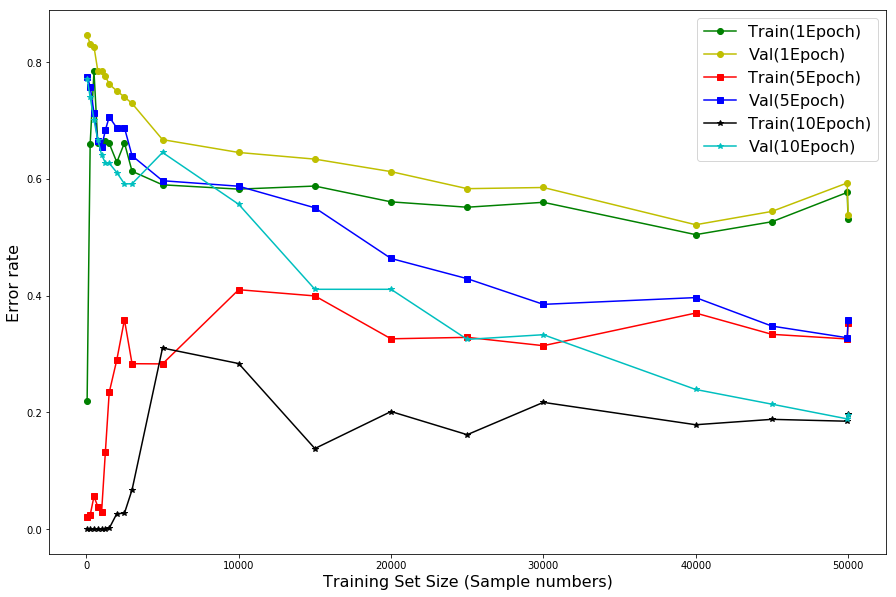

In [33]:
#Drawing learning curve
plt.figure(figsize = (15,10))
plt.plot(Train_size_list_1ep, Train_error_list_1ep, 'go-', label = "Train(1Epoch)")
plt.plot(Train_size_list_1ep, Val_error_list_1ep, 'yo-', label = "Val(1Epoch)")
plt.plot(Train_size_list_5ep, Train_error_list_5ep, 'rs-', label = "Train(5Epoch)")
plt.plot(Train_size_list_5ep, Val_error_list_5ep, 'bs-', label = "Val(5Epoch)")
plt.plot(Train_size_list_10ep, Train_error_list_10ep, 'k*-', label = "Train(10Epoch)")
plt.plot(Train_size_list_10ep, Val_error_list_10ep, 'c*-', label = "Val(10Epoch)")
 

plt.xlabel('Training Set Size (Sample numbers)',fontsize=16)
plt.ylabel('Error rate',fontsize=16)
plt.legend(loc="upper right", fontsize=16)
#plt.xlim(0,10000)

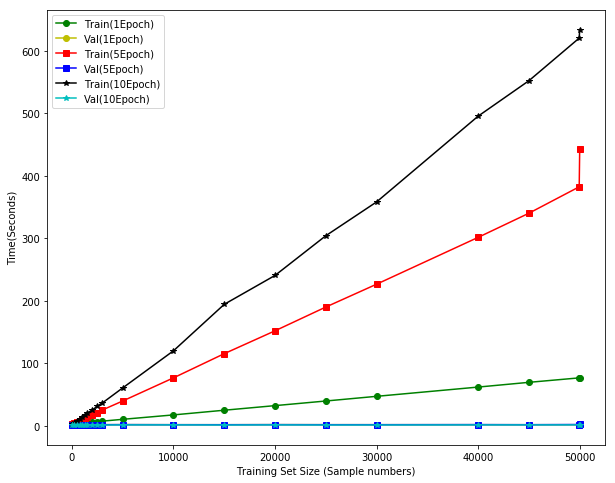

In [34]:
#Drawing train/val time v.s. training set

plt.figure(figsize = (10,8))
plt.plot(Train_size_list_1ep, Train_time_list_1ep, 'go-', label = "Train(1Epoch)")
plt.plot(Train_size_list_1ep, Val_time_list_1ep, 'yo-', label = "Val(1Epoch)")
plt.plot(Train_size_list_5ep, Train_time_list_5ep, 'rs-', label = "Train(5Epoch)")
plt.plot(Train_size_list_5ep, Val_time_list_5ep, 'bs-', label = "Val(5Epoch)")
plt.plot(Train_size_list_10ep, Train_time_list_10ep, 'k*-', label = "Train(10Epoch)")
plt.plot(Train_size_list_10ep, Val_time_list_10ep, 'c*-', label = "Val(10Epoch)")
 

plt.xlabel('Training Set Size (Sample numbers)')
plt.ylabel('Time(Seconds)')
plt.legend(loc="upper left", fontsize=10)

In [35]:
Nron_size_list_RELU = []
Train_error_list_RELU = []
Val_error_list_RELU = []
Train_time_list_RELU = []
Val_time_list_RELU = []

from sklearn.model_selection import train_test_split

for j in [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000,3000,5000,8000,10000]:

    Nron_size_list_RELU.append(j)
    print('Neuron_set_size:', j)
    
    X_train_scaled_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(X_train_scaled, train_Y, test_size = 0, random_state = 42)
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled_partial)
    
    dnn_1_clf_nron = tf.contrib.learn.DNNClassifier(hidden_units=[j], n_classes=10, feature_columns=feature_columns, config=config)
    dnn_1_clf_nron = tf.contrib.learn.SKCompat(dnn_1_clf_nron) # if TensorFlow >= 1.1
    #dnn_1_clf.fit(X_train_partial, y_train_partial, batch_size=50, max_steps=40000)
    
    start=datetime.now()
    dnn_1_clf_nron.fit(X_train_scaled_partial, y_train_partial, batch_size=64, steps=((1-0)*1100) )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf_nron training time', Train_elapse)
    Train_time_list_RELU.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf_nron.predict(X_train_scaled_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

    
    
    #print(dnn_1_clf.score(X_train_partial))##doesn't work. it has no score method

   
    start=datetime.now()
    y_val_pred =  dnn_1_clf_nron.predict(X_val_scaled)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    #print('dnn_1_clf val time', Val_elapse)
    Val_time_list_RELU.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
    #Val_error = 1 - cross_val_score(dnn_1_clf, X_train_partial, y_train_partial, n_jobs = 3, cv=3, scoring="accuracy").mean()  
    
    print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
    Train_error_list_RELU.append(Train_error)
    Val_error_list_RELU.append(Val_error)
    
print("Nron_size_list_RELU: ", Nron_size_list_RELU)
print("Train_error_list_RELU: ", Train_error_list_RELU)
print("Val_error_list_RELU: ", Val_error_list_RELU)
print("Train_time_list_RELU: ", Train_time_list_RELU)
print("Val_time_list_RELU: ", Val_time_list_RELU)   

Neuron_set_size: 10
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E2C018BA20>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\DEEPAK\\AppData\\Local\\Temp\\tmpom78kcwv'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local\Temp\tmp5tj2ucht\model.ckpt-1100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.49541999999999997 / 0.5096
Neuron_set_size: 150
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E2C002DF98>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_

INFO:tensorflow:global_step/sec: 163.312
INFO:tensorflow:loss = 1.4654071, step = 1001 (0.612 sec)
INFO:tensorflow:Saving checkpoints for 1100 into C:\Users\DEEPAK\AppData\Local\Temp\tmpmbsabpxc\model.ckpt.
INFO:tensorflow:Loss for final step: 1.6034608.
dnn_1_clf_nron training time 6.811314
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local\Temp\tmpmbsabpxc\model.ckpt-1100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local\Temp\tmpmbsabpxc\model.ckpt-1100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.49056 / 0.49660000000000004
Neuron_set_size: 300
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E2C040D470>, '_master': '', '_n

INFO:tensorflow:loss = 1.7575574, step = 501 (0.828 sec)
INFO:tensorflow:global_step/sec: 117.823
INFO:tensorflow:loss = 1.6775367, step = 601 (0.849 sec)
INFO:tensorflow:global_step/sec: 118.493
INFO:tensorflow:loss = 1.5254134, step = 701 (0.844 sec)
INFO:tensorflow:global_step/sec: 125.869
INFO:tensorflow:loss = 1.222818, step = 801 (0.794 sec)
INFO:tensorflow:global_step/sec: 120.835
INFO:tensorflow:loss = 1.7670939, step = 901 (0.829 sec)
INFO:tensorflow:global_step/sec: 121.932
INFO:tensorflow:loss = 1.5042968, step = 1001 (0.819 sec)
INFO:tensorflow:Saving checkpoints for 1100 into C:\Users\DEEPAK\AppData\Local\Temp\tmpq0p1o8pv\model.ckpt.
INFO:tensorflow:Loss for final step: 1.5849339.
dnn_1_clf_nron training time 9.876621
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local\Temp\tmpq0p1o8pv\model.ckpt-1100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalize

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DEEPAK\AppData\Local\Temp\tmpk2w63kk_\model.ckpt.
INFO:tensorflow:loss = 3.0062466, step = 1
INFO:tensorflow:global_step/sec: 79.4794
INFO:tensorflow:loss = 1.6226761, step = 101 (1.260 sec)
INFO:tensorflow:global_step/sec: 77.2464
INFO:tensorflow:loss = 1.5213339, step = 201 (1.296 sec)
INFO:tensorflow:global_step/sec: 76.6859
INFO:tensorflow:loss = 1.3554363, step = 301 (1.304 sec)
INFO:tensorflow:global_step/sec: 77.9361
INFO:tensorflow:loss = 1.6671734, step = 401 (1.283 sec)
INFO:tensorflow:global_step/sec: 75.792
INFO:tensorflow:loss = 1.8784134, step = 501 (1.318 sec)
INFO:tensorflow:global_step/sec: 76.6268
INFO:tensorflow:loss = 1.6916645, step = 601 (1.305 sec)
INFO:tensorflow:global_step/sec: 76.7487
INFO:tensorflow:loss = 1.562014, step = 701 (1.303 sec)
INFO

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DEEPAK\AppData\Local\Temp\tmphfqpu9p2\model.ckpt.
INFO:tensorflow:loss = 2.893417, step = 1
INFO:tensorflow:global_step/sec: 67.1998
INFO:tensorflow:loss = 1.6732519, step = 101 (1.489 sec)
INFO:tensorflow:global_step/sec: 64.2518
INFO:tensorflow:loss = 1.4624367, step = 201 (1.557 sec)
INFO:tensorflow:global_step/sec: 60.7485
INFO:tensorflow:loss = 1.3272479, step = 301 (1.649 sec)
INFO:tensorflow:global_step/sec: 54.1327
INFO:tensorflow:loss = 1.6946856, step = 401 (1.844 sec)
INFO:tensorflow:global_step/sec: 48.7303
INFO:tensorflow:loss = 1.8414557, step = 501 (2.051 sec)
INFO:tensorflow:global_step/sec: 53.9974
INFO:tensorflow:loss = 1.7088251, step = 601 (1.853 sec)
INFO:tensorflow:global_step/sec: 59.5221
INFO:tensorflow:loss = 1.5440574, step = 701 (1.679 sec)
INF

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DEEPAK\AppData\Local\Temp\tmp78xe0krc\model.ckpt.
INFO:tensorflow:loss = 2.8037558, step = 1
INFO:tensorflow:global_step/sec: 52.569
INFO:tensorflow:loss = 1.6972972, step = 101 (1.905 sec)
INFO:tensorflow:global_step/sec: 50.9815
INFO:tensorflow:loss = 1.5001099, step = 201 (1.961 sec)
INFO:tensorflow:global_step/sec: 53.3906
INFO:tensorflow:loss = 1.4057806, step = 301 (1.873 sec)
INFO:tensorflow:global_step/sec: 52.6474
INFO:tensorflow:loss = 1.7027702, step = 401 (1.899 sec)
INFO:tensorflow:global_step/sec: 52.7976
INFO:tensorflow:loss = 1.9619328, step = 501 (1.894 sec)
INFO:tensorflow:global_step/sec: 51.9211
INFO:tensorflow:loss = 1.7319529, step = 601 (1.925 sec)
INFO:tensorflow:global_step/sec: 53.4329
INFO:tensorflow:loss = 1.6417689, step = 701 (1.872 sec)
INF

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DEEPAK\AppData\Local\Temp\tmpmcqm2llo\model.ckpt.
INFO:tensorflow:loss = 2.6259432, step = 1
INFO:tensorflow:global_step/sec: 7.03141
INFO:tensorflow:loss = 2.1905167, step = 101 (14.223 sec)
INFO:tensorflow:global_step/sec: 7.0827
INFO:tensorflow:loss = 1.8619108, step = 201 (14.120 sec)
INFO:tensorflow:global_step/sec: 7.24908
INFO:tensorflow:loss = 1.8134413, step = 301 (13.795 sec)
INFO:tensorflow:global_step/sec: 7.02759
INFO:tensorflow:loss = 1.9669733, step = 401 (14.229 sec)
INFO:tensorflow:global_step/sec: 7.11857
INFO:tensorflow:loss = 2.4927697, step = 501 (14.049 sec)
INFO:tensorflow:global_step/sec: 6.95448
INFO:tensorflow:loss = 1.9165779, step = 601 (14.379 sec)
INFO:tensorflow:global_step/sec: 6.85996
INFO:tensorflow:loss = 1.8745072, step = 701 (14.577 s

In [36]:
Nron_size_list_SIGMO = []
Train_error_list_SIGMO = []
Val_error_list_SIGMO= []
Train_time_list_SIGMO = []
Val_time_list_SIGMO = []

from sklearn.model_selection import train_test_split

for j in [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000,3000,5000, 8000,10000]:

    Nron_size_list_SIGMO.append(j)
    print('Neuron_set_size:', j)
    
    X_train_scaled_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(X_train_scaled, train_Y, test_size = 0, random_state = 42)
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled_partial)
    
    dnn_1_clf_nron = tf.contrib.learn.DNNClassifier(hidden_units=[j], n_classes=10,activation_fn=tf.nn.sigmoid, feature_columns=feature_columns, config=config)
    dnn_1_clf_nron = tf.contrib.learn.SKCompat(dnn_1_clf_nron) # if TensorFlow >= 1.1
    #dnn_1_clf.fit(X_train_partial, y_train_partial, batch_size=50, max_steps=40000)
    
    start=datetime.now()
    dnn_1_clf_nron.fit(X_train_scaled_partial, y_train_partial, batch_size=64, steps=((1-0)*1100) )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf_nron training time', Train_elapse)
    Train_time_list_SIGMO.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf_nron.predict(X_train_scaled_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

    
    
    #print(dnn_1_clf.score(X_train_partial))##doesn't work. it has no score method

   
    start=datetime.now()
    y_val_pred =  dnn_1_clf_nron.predict(X_val_scaled)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    #print('dnn_1_clf val time', Val_elapse)
    Val_time_list_SIGMO.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
    #Val_error = 1 - cross_val_score(dnn_1_clf, X_train_partial, y_train_partial, n_jobs = 3, cv=3, scoring="accuracy").mean()  
    
    print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
    Train_error_list_SIGMO.append(Train_error)
    Val_error_list_SIGMO.append(Val_error)
    
print("Nron_size_list_SIGMO: ", Nron_size_list_SIGMO)
print("Train_error_list_SIGMO: ", Train_error_list_SIGMO)
print("Val_error_list_SIGMO: ", Val_error_list_SIGMO)
print("Train_time_list_SIGMO: ", Train_time_list_SIGMO)
print("Val_time_list_SIGMO: ", Val_time_list_SIGMO)  

Neuron_set_size: 10
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E2C0501208>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\DEEPAK\\AppData\\Local\\Temp\\tmpcppy4zz3'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local\Temp\tmp0uhfto_k\model.ckpt-1100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.54696 / 0.5660000000000001
Neuron_set_size: 150
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E2C0620D68>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_

INFO:tensorflow:global_step/sec: 178.412
INFO:tensorflow:loss = 1.5139476, step = 1001 (0.561 sec)
INFO:tensorflow:Saving checkpoints for 1100 into C:\Users\DEEPAK\AppData\Local\Temp\tmpm1jli1nr\model.ckpt.
INFO:tensorflow:Loss for final step: 1.817566.
dnn_1_clf_nron training time 7.153487
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local\Temp\tmpm1jli1nr\model.ckpt-1100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local\Temp\tmpm1jli1nr\model.ckpt-1100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.5374399999999999 / 0.5548
Neuron_set_size: 300
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E2C05FCC88>, '_master': '', '_num_

INFO:tensorflow:global_step/sec: 116.909
INFO:tensorflow:loss = 1.6866516, step = 601 (0.855 sec)
INFO:tensorflow:global_step/sec: 118.095
INFO:tensorflow:loss = 1.8519351, step = 701 (0.847 sec)
INFO:tensorflow:global_step/sec: 99.5687
INFO:tensorflow:loss = 1.483011, step = 801 (1.004 sec)
INFO:tensorflow:global_step/sec: 109.52
INFO:tensorflow:loss = 1.8958509, step = 901 (0.913 sec)
INFO:tensorflow:global_step/sec: 118.924
INFO:tensorflow:loss = 1.5270387, step = 1001 (0.841 sec)
INFO:tensorflow:Saving checkpoints for 1100 into C:\Users\DEEPAK\AppData\Local\Temp\tmp_1fvw82u\model.ckpt.
INFO:tensorflow:Loss for final step: 1.8441712.
dnn_1_clf_nron training time 10.168858
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local\Temp\tmp_1fvw82u\model.ckpt-1100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEE

INFO:tensorflow:loss = 1.7708561, step = 101 (1.013 sec)
INFO:tensorflow:global_step/sec: 97.061
INFO:tensorflow:loss = 1.7146937, step = 201 (1.030 sec)
INFO:tensorflow:global_step/sec: 96.8289
INFO:tensorflow:loss = 1.5819254, step = 301 (1.034 sec)
INFO:tensorflow:global_step/sec: 96.993
INFO:tensorflow:loss = 1.7072515, step = 401 (1.030 sec)
INFO:tensorflow:global_step/sec: 99.2624
INFO:tensorflow:loss = 1.7990499, step = 501 (1.008 sec)
INFO:tensorflow:global_step/sec: 98.6886
INFO:tensorflow:loss = 1.7439581, step = 601 (1.011 sec)
INFO:tensorflow:global_step/sec: 98.6531
INFO:tensorflow:loss = 1.8822547, step = 701 (1.015 sec)
INFO:tensorflow:global_step/sec: 101.188
INFO:tensorflow:loss = 1.5040364, step = 801 (0.989 sec)
INFO:tensorflow:global_step/sec: 100.417
INFO:tensorflow:loss = 1.9010193, step = 901 (0.995 sec)
INFO:tensorflow:global_step/sec: 101.024
INFO:tensorflow:loss = 1.4798651, step = 1001 (0.990 sec)
INFO:tensorflow:Saving checkpoints for 1100 into C:\Users\DEEP

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DEEPAK\AppData\Local\Temp\tmpwaxpowlq\model.ckpt.
INFO:tensorflow:loss = 2.5185757, step = 1
INFO:tensorflow:global_step/sec: 84.6652
INFO:tensorflow:loss = 1.8168124, step = 101 (1.183 sec)
INFO:tensorflow:global_step/sec: 80.1481
INFO:tensorflow:loss = 1.7159768, step = 201 (1.249 sec)
INFO:tensorflow:global_step/sec: 80.2141
INFO:tensorflow:loss = 1.6190579, step = 301 (1.246 sec)
INFO:tensorflow:global_step/sec: 81.6835
INFO:tensorflow:loss = 1.7053132, step = 401 (1.224 sec)
INFO:tensorflow:global_step/sec: 81.2847
INFO:tensorflow:loss = 1.8246952, step = 501 (1.230 sec)
INFO:tensorflow:global_step/sec: 80.3835
INFO:tensorflow:loss = 1.741688, step = 601 (1.245 sec)
INFO:tensorflow:global_step/sec: 79.2279
INFO:tensorflow:loss = 1.878152, step = 701 (1.261 sec)
INFO

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DEEPAK\AppData\Local\Temp\tmpmjzn_79w\model.ckpt.
INFO:tensorflow:loss = 2.4936275, step = 1
INFO:tensorflow:global_step/sec: 67.1163
INFO:tensorflow:loss = 1.8903327, step = 101 (1.492 sec)
INFO:tensorflow:global_step/sec: 65.9855
INFO:tensorflow:loss = 1.7465258, step = 201 (1.515 sec)
INFO:tensorflow:global_step/sec: 67.4084
INFO:tensorflow:loss = 1.6964164, step = 301 (1.484 sec)
INFO:tensorflow:global_step/sec: 66.986
INFO:tensorflow:loss = 1.6994519, step = 401 (1.492 sec)
INFO:tensorflow:global_step/sec: 67.4597
INFO:tensorflow:loss = 1.8453281, step = 501 (1.482 sec)
INFO:tensorflow:global_step/sec: 68.3021
INFO:tensorflow:loss = 1.7388554, step = 601 (1.464 sec)
INFO:tensorflow:global_step/sec: 67.5203
INFO:tensorflow:loss = 1.8552796, step = 701 (1.481 sec)
INF

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DEEPAK\AppData\Local\Temp\tmp89xqfhu9\model.ckpt.
INFO:tensorflow:loss = 2.515956, step = 1
INFO:tensorflow:global_step/sec: 57.2918
INFO:tensorflow:loss = 1.9015412, step = 101 (1.747 sec)
INFO:tensorflow:global_step/sec: 57.1204
INFO:tensorflow:loss = 1.7473211, step = 201 (1.750 sec)
INFO:tensorflow:global_step/sec: 56.3456
INFO:tensorflow:loss = 1.8126609, step = 301 (1.775 sec)
INFO:tensorflow:global_step/sec: 57.6829
INFO:tensorflow:loss = 1.7197717, step = 401 (1.734 sec)
INFO:tensorflow:global_step/sec: 56.1707
INFO:tensorflow:loss = 1.8993871, step = 501 (1.780 sec)
INFO:tensorflow:global_step/sec: 57.1999
INFO:tensorflow:loss = 1.7727829, step = 601 (1.748 sec)
INFO:tensorflow:global_step/sec: 57.6462
INFO:tensorflow:loss = 1.8971468, step = 701 (1.735 sec)
INF

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DEEPAK\AppData\Local\Temp\tmpx9sskl3r\model.ckpt.
INFO:tensorflow:loss = 2.5883758, step = 1
INFO:tensorflow:global_step/sec: 7.52687
INFO:tensorflow:loss = 14.676141, step = 101 (13.287 sec)
INFO:tensorflow:global_step/sec: 7.63991
INFO:tensorflow:loss = 10.979019, step = 201 (13.089 sec)
INFO:tensorflow:global_step/sec: 7.5893
INFO:tensorflow:loss = 8.320284, step = 301 (13.176 sec)
INFO:tensorflow:global_step/sec: 7.60127
INFO:tensorflow:loss = 9.023671, step = 401 (13.157 sec)
INFO:tensorflow:global_step/sec: 7.64655
INFO:tensorflow:loss = 5.126345, step = 501 (13.078 sec)
INFO:tensorflow:global_step/sec: 7.58113
INFO:tensorflow:loss = 6.6967044, step = 601 (13.190 sec)
INFO:tensorflow:global_step/sec: 7.63919
INFO:tensorflow:loss = 3.6591272, step = 701 (13.091 sec)

In [37]:
Nron_size_list_TANH = []
Train_error_list_TANH = []
Val_error_list_TANH= []
Train_time_list_TANH = []
Val_time_list_TANH = []

from sklearn.model_selection import train_test_split

for j in [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000,3000,5000,8000, 10000]:

    Nron_size_list_TANH.append(j)
    print('Neuron_set_size:', j)
    
    X_train_scaled_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(X_train_scaled, train_Y, test_size = 0, random_state = 42)
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled_partial)
    
    dnn_1_clf_nron = tf.contrib.learn.DNNClassifier(hidden_units=[j], n_classes=10,activation_fn=tf.nn.tanh, feature_columns=feature_columns, config=config)
    dnn_1_clf_nron = tf.contrib.learn.SKCompat(dnn_1_clf_nron) # if TensorFlow >= 1.1
    #dnn_1_clf.fit(X_train_partial, y_train_partial, batch_size=50, max_steps=40000)
    
    start=datetime.now()
    dnn_1_clf_nron.fit(X_train_scaled_partial, y_train_partial, batch_size=64, steps=((1-0)*1100) )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf_nron training time', Train_elapse)
    Train_time_list_TANH.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf_nron.predict(X_train_scaled_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

    
    
    #print(dnn_1_clf.score(X_train_partial))##doesn't work. it has no score method

   
    start=datetime.now()
    y_val_pred =  dnn_1_clf_nron.predict(X_val_scaled)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    #print('dnn_1_clf val time', Val_elapse)
    Val_time_list_TANH.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
    #Val_error = 1 - cross_val_score(dnn_1_clf, X_train_partial, y_train_partial, n_jobs = 3, cv=3, scoring="accuracy").mean()  
    
    print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
    Train_error_list_TANH.append(Train_error)
    Val_error_list_TANH.append(Val_error)
    
print("Nron_size_list_TANH: ", Nron_size_list_TANH)
print("Train_error_list_TANH: ", Train_error_list_TANH)
print("Val_error_list_TANH: ", Val_error_list_TANH)
print("Train_time_list_TANH: ", Train_time_list_TANH)
print("Val_time_list_TANH: ", Val_time_list_TANH)  

Neuron_set_size: 10
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E30C40FE10>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\DEEPAK\\AppData\\Local\\Temp\\tmphgav3o3a'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local\Temp\tmp94hti162\model.ckpt-1100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.56334 / 0.5758
Neuron_set_size: 150
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E2C06D2D30>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None

INFO:tensorflow:global_step/sec: 198.943
INFO:tensorflow:loss = 1.5133961, step = 1001 (0.504 sec)
INFO:tensorflow:Saving checkpoints for 1100 into C:\Users\DEEPAK\AppData\Local\Temp\tmpkqbdj8kn\model.ckpt.
INFO:tensorflow:Loss for final step: 1.7446975.
dnn_1_clf_nron training time 6.142804
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local\Temp\tmpkqbdj8kn\model.ckpt-1100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local\Temp\tmpkqbdj8kn\model.ckpt-1100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.5400400000000001 / 0.5546
Neuron_set_size: 300
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E2C07A56D8>, '_master': '', '_num

INFO:tensorflow:loss = 1.7977636, step = 501 (0.762 sec)
INFO:tensorflow:global_step/sec: 135.497
INFO:tensorflow:loss = 1.7477336, step = 601 (0.737 sec)
INFO:tensorflow:global_step/sec: 134.047
INFO:tensorflow:loss = 1.908953, step = 701 (0.746 sec)
INFO:tensorflow:global_step/sec: 133.869
INFO:tensorflow:loss = 1.4516153, step = 801 (0.747 sec)
INFO:tensorflow:global_step/sec: 136.978
INFO:tensorflow:loss = 1.881419, step = 901 (0.730 sec)
INFO:tensorflow:global_step/sec: 136.791
INFO:tensorflow:loss = 1.5126199, step = 1001 (0.731 sec)
INFO:tensorflow:Saving checkpoints for 1100 into C:\Users\DEEPAK\AppData\Local\Temp\tmp35kjej59\model.ckpt.
INFO:tensorflow:Loss for final step: 1.7797105.
dnn_1_clf_nron training time 8.817305
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local\Temp\tmp35kjej59\model.ckpt-1100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized

INFO:tensorflow:global_step/sec: 107.815
INFO:tensorflow:loss = 1.8675857, step = 101 (0.928 sec)
INFO:tensorflow:global_step/sec: 104.12
INFO:tensorflow:loss = 1.6225152, step = 201 (0.961 sec)
INFO:tensorflow:global_step/sec: 104.554
INFO:tensorflow:loss = 1.5835196, step = 301 (0.956 sec)
INFO:tensorflow:global_step/sec: 104.337
INFO:tensorflow:loss = 1.843035, step = 401 (0.958 sec)
INFO:tensorflow:global_step/sec: 104.663
INFO:tensorflow:loss = 1.8375148, step = 501 (0.954 sec)
INFO:tensorflow:global_step/sec: 104.554
INFO:tensorflow:loss = 1.811703, step = 601 (0.957 sec)
INFO:tensorflow:global_step/sec: 104.228
INFO:tensorflow:loss = 1.9572378, step = 701 (0.959 sec)
INFO:tensorflow:global_step/sec: 103.262
INFO:tensorflow:loss = 1.4416108, step = 801 (0.968 sec)
INFO:tensorflow:global_step/sec: 105.213
INFO:tensorflow:loss = 1.9076054, step = 901 (0.950 sec)
INFO:tensorflow:global_step/sec: 104.337
INFO:tensorflow:loss = 1.614557, step = 1001 (0.958 sec)
INFO:tensorflow:Saving 

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DEEPAK\AppData\Local\Temp\tmpm2isxeza\model.ckpt.
INFO:tensorflow:loss = 3.0715306, step = 1
INFO:tensorflow:global_step/sec: 90.0875
INFO:tensorflow:loss = 1.9307508, step = 101 (1.112 sec)
INFO:tensorflow:global_step/sec: 86.6617
INFO:tensorflow:loss = 1.6877781, step = 201 (1.154 sec)
INFO:tensorflow:global_step/sec: 85.4795
INFO:tensorflow:loss = 1.6556377, step = 301 (1.170 sec)
INFO:tensorflow:global_step/sec: 86.2147
INFO:tensorflow:loss = 1.8487659, step = 401 (1.161 sec)
INFO:tensorflow:global_step/sec: 86.0665
INFO:tensorflow:loss = 1.9136283, step = 501 (1.160 sec)
INFO:tensorflow:global_step/sec: 86.2147
INFO:tensorflow:loss = 1.8404193, step = 601 (1.161 sec)
INFO:tensorflow:global_step/sec: 85.4795
INFO:tensorflow:loss = 1.9482418, step = 701 (1.170 sec)
IN

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DEEPAK\AppData\Local\Temp\tmpv8dhyadp\model.ckpt.
INFO:tensorflow:loss = 2.840344, step = 1
INFO:tensorflow:global_step/sec: 74.2343
INFO:tensorflow:loss = 1.9081767, step = 101 (1.348 sec)
INFO:tensorflow:global_step/sec: 71.4665
INFO:tensorflow:loss = 1.6617786, step = 201 (1.399 sec)
INFO:tensorflow:global_step/sec: 71.7222
INFO:tensorflow:loss = 1.6745495, step = 301 (1.394 sec)
INFO:tensorflow:global_step/sec: 71.9279
INFO:tensorflow:loss = 1.8488741, step = 401 (1.390 sec)
INFO:tensorflow:global_step/sec: 71.928
INFO:tensorflow:loss = 1.920179, step = 501 (1.390 sec)
INFO:tensorflow:global_step/sec: 71.8764
INFO:tensorflow:loss = 1.822703, step = 601 (1.391 sec)
INFO:tensorflow:global_step/sec: 71.8764
INFO:tensorflow:loss = 1.9955888, step = 701 (1.391 sec)
INFO:t

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DEEPAK\AppData\Local\Temp\tmp854c4gsi\model.ckpt.
INFO:tensorflow:loss = 2.6297202, step = 1
INFO:tensorflow:global_step/sec: 62.8213
INFO:tensorflow:loss = 1.9514482, step = 101 (1.594 sec)
INFO:tensorflow:global_step/sec: 61.0271
INFO:tensorflow:loss = 1.7173376, step = 201 (1.639 sec)
INFO:tensorflow:global_step/sec: 60.5847
INFO:tensorflow:loss = 1.6554884, step = 301 (1.651 sec)
INFO:tensorflow:global_step/sec: 61.2134
INFO:tensorflow:loss = 1.9210142, step = 401 (1.634 sec)
INFO:tensorflow:global_step/sec: 61.0643
INFO:tensorflow:loss = 1.9953578, step = 501 (1.638 sec)
INFO:tensorflow:global_step/sec: 58.9809
INFO:tensorflow:loss = 1.8662456, step = 601 (1.695 sec)
INFO:tensorflow:global_step/sec: 60.99
INFO:tensorflow:loss = 2.0274925, step = 701 (1.640 sec)
INFO

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DEEPAK\AppData\Local\Temp\tmpbztl019b\model.ckpt.
INFO:tensorflow:loss = 2.6733465, step = 1
INFO:tensorflow:global_step/sec: 8.10095
INFO:tensorflow:loss = 2.86555, step = 101 (12.346 sec)
INFO:tensorflow:global_step/sec: 8.20386
INFO:tensorflow:loss = 2.2565854, step = 201 (12.190 sec)
INFO:tensorflow:global_step/sec: 8.22742
INFO:tensorflow:loss = 1.9861894, step = 301 (12.154 sec)
INFO:tensorflow:global_step/sec: 8.24772
INFO:tensorflow:loss = 2.3663044, step = 401 (12.124 sec)
INFO:tensorflow:global_step/sec: 8.18244
INFO:tensorflow:loss = 2.45189, step = 501 (12.221 sec)
INFO:tensorflow:global_step/sec: 8.19581
INFO:tensorflow:loss = 2.0427892, step = 601 (12.201 sec)
INFO:tensorflow:global_step/sec: 8.17976
INFO:tensorflow:loss = 2.484736, step = 701 (12.226 sec)


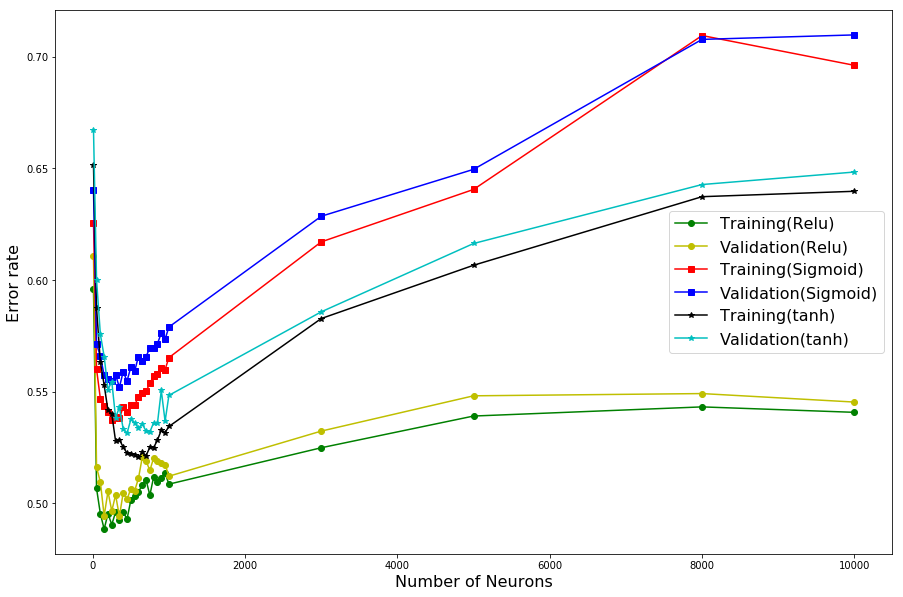

In [38]:
plt.figure(figsize = (15,10))
plt.plot(Nron_size_list_RELU, Train_error_list_RELU, 'go-', label = "Training(Relu)")
plt.plot(Nron_size_list_RELU, Val_error_list_RELU, 'yo-', label = "Validation(Relu)")
plt.plot(Nron_size_list_SIGMO, Train_error_list_SIGMO, 'rs-', label = "Training(Sigmoid)")
plt.plot(Nron_size_list_SIGMO, Val_error_list_SIGMO, 'bs-', label = "Validation(Sigmoid)") 
plt.plot(Nron_size_list_TANH, Train_error_list_TANH, 'k*-', label = "Training(tanh)")
plt.plot(Nron_size_list_TANH, Val_error_list_TANH, 'c*-', label = "Validation(tanh)")

plt.xlabel('Number of Neurons',fontsize=16)
plt.ylabel('Error rate',fontsize=16)
plt.legend(fontsize=16)

(0, 1000)

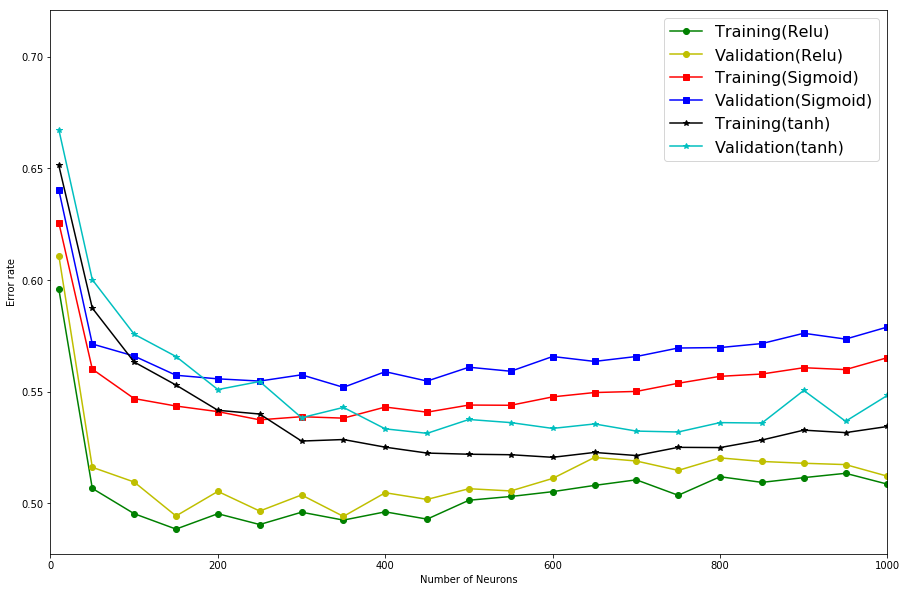

In [39]:
plt.figure(figsize = (15,10))
plt.plot(Nron_size_list_RELU, Train_error_list_RELU, 'go-', label = "Training(Relu)")
plt.plot(Nron_size_list_RELU, Val_error_list_RELU, 'yo-', label = "Validation(Relu)")
plt.plot(Nron_size_list_SIGMO, Train_error_list_SIGMO, 'rs-', label = "Training(Sigmoid)")
plt.plot(Nron_size_list_SIGMO, Val_error_list_SIGMO, 'bs-', label = "Validation(Sigmoid)") 
plt.plot(Nron_size_list_TANH, Train_error_list_TANH, 'k*-', label = "Training(tanh)")
plt.plot(Nron_size_list_TANH, Val_error_list_TANH, 'c*-', label = "Validation(tanh)")

plt.xlabel('Number of Neurons')
plt.ylabel('Error rate')
plt.legend(fontsize=16)
plt.xlim(0, 1000)

In [40]:
best_val_locatin_RELU = np.argmin(Val_error_list_RELU)
print("BEST VALIDATION ERROR", Val_error_list_RELU[best_val_locatin_RELU])
print("BEST VALIDATION ACCURACY", 1 - Val_error_list_RELU[best_val_locatin_RELU])
best_val_locatin_RELU

BEST VALIDATION ERROR 0.4942
BEST VALIDATION ACCURACY 0.5058


7

In [41]:
Nron_size_list_RELU[best_val_locatin_RELU]

350

In [42]:
Nron_size_list_FR = []
Train_error_list_FR = []
Val_error_list_FR = []
Train_time_list_FR = []
Val_time_list_FR = []

from sklearn.model_selection import train_test_split

for j in [250, 275, 300,325, 350,375, 400, 425, 450, 475, 500,525,550,575,600,625,650,675,700,725,750, 784,800]:

#[250, 275, 300,325, 350,375, 400, 425, 450, 784]:

    Nron_size_list_FR.append(j)
    print('Neuron_set_size:', j)
    
    X_train_scaled_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(X_train_scaled, train_Y, test_size = 0, random_state = 42)
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled_partial)
    
    dnn_1_clf_nron = tf.contrib.learn.DNNClassifier(hidden_units=[j], n_classes=10, activation_fn=tf.nn.relu,feature_columns=feature_columns, config=config)
    dnn_1_clf_nron = tf.contrib.learn.SKCompat(dnn_1_clf_nron) # if TensorFlow >= 1.1
    #dnn_1_clf.fit(X_train_partial, y_train_partial, batch_size=50, max_steps=40000)
    
    start=datetime.now()
    dnn_1_clf_nron.fit(X_train_scaled_partial, y_train_partial, batch_size=50,  steps=5500 )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf_nron training time', Train_elapse)
    Train_time_list_FR.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf_nron.predict(X_train_scaled_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

    
    
    #print(dnn_1_clf.score(X_train_partial))##doesn't work. it has no score method

   
    start=datetime.now()
    y_val_pred =  dnn_1_clf_nron.predict(X_val_scaled)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    #print('dnn_1_clf val time', Val_elapse)
    Val_time_list_FR.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
    #Val_error = 1 - cross_val_score(dnn_1_clf, X_train_partial, y_train_partial, n_jobs = 3, cv=3, scoring="accuracy").mean()  
    
    print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
    Train_error_list_FR.append(Train_error)
    Val_error_list_FR.append(Val_error)
    
print("Nron_size_list_FR: ", Nron_size_list_FR)
print("Train_error_list_FR: ", Train_error_list_FR)
print("Val_error_list_FR: ", Val_error_list_FR)
print("Train_time_list_FR: ", Train_time_list_FR)
print("Val_time_list_FR: ", Val_time_list_FR)   

Neuron_set_size: 250
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E2C0CE9DD8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\DEEPAK\\AppData\\Local\\Temp\\tmp5u4nc2s5'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 int

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DEEPAK\AppData\Local\Temp\tmpevw8biyq\model.ckpt.
INFO:tensorflow:loss = 3.431679, step = 1
INFO:tensorflow:global_step/sec: 123.629
INFO:tensorflow:loss = 1.7744529, step = 101 (0.813 sec)
INFO:tensorflow:global_step/sec: 132.188
INFO:tensorflow:loss = 1.7100296, step = 201 (0.757 sec)
INFO:tensorflow:global_step/sec: 124.236
INFO:tensorflow:loss = 1.9269332, step = 301 (0.804 sec)
INFO:tensorflow:global_step/sec: 125.116
INFO:tensorflow:loss = 2.151351, step = 401 (0.801 sec)
INFO:tensorflow:global_step/sec: 123.295
INFO:tensorflow:loss = 1.656632, step = 501 (0.810 sec)
INFO:tensorflow:global_step/sec: 135.272
INFO:tensorflow:loss = 1.7361553, step = 601 (0.741 sec)
INFO:tensorflow:global_step/sec: 127.379
INFO:tensorflow:loss = 1.4985225, step = 701 (0.782 sec)
INFO:tensorflow:global_step/sec: 130.064
INFO:tensorflow:loss = 1.5305845, step = 801 

INFO:tensorflow:loss = 1.4921144, step = 801 (0.808 sec)
INFO:tensorflow:global_step/sec: 121.698
INFO:tensorflow:loss = 1.4446404, step = 901 (0.823 sec)
INFO:tensorflow:global_step/sec: 121.728
INFO:tensorflow:loss = 1.371896, step = 1001 (0.820 sec)
INFO:tensorflow:global_step/sec: 123.643
INFO:tensorflow:loss = 1.459143, step = 1101 (0.810 sec)
INFO:tensorflow:global_step/sec: 121.601
INFO:tensorflow:loss = 1.3321484, step = 1201 (0.820 sec)
INFO:tensorflow:global_step/sec: 122.197
INFO:tensorflow:loss = 1.3014821, step = 1301 (0.819 sec)
INFO:tensorflow:global_step/sec: 123.207
INFO:tensorflow:loss = 1.4559995, step = 1401 (0.812 sec)
INFO:tensorflow:global_step/sec: 122.066
INFO:tensorflow:loss = 1.6365734, step = 1501 (0.816 sec)
INFO:tensorflow:global_step/sec: 122.358
INFO:tensorflow:loss = 1.30381, step = 1601 (0.818 sec)
INFO:tensorflow:global_step/sec: 122.165
INFO:tensorflow:loss = 1.5837755, step = 1701 (0.822 sec)
INFO:tensorflow:global_step/sec: 122.212
INFO:tensorflow:

INFO:tensorflow:loss = 1.4228419, step = 1801 (0.919 sec)
INFO:tensorflow:global_step/sec: 110.108
INFO:tensorflow:loss = 1.720309, step = 1901 (0.910 sec)
INFO:tensorflow:global_step/sec: 108.573
INFO:tensorflow:loss = 1.3236924, step = 2001 (0.922 sec)
INFO:tensorflow:global_step/sec: 107.282
INFO:tensorflow:loss = 1.2749095, step = 2101 (0.931 sec)
INFO:tensorflow:global_step/sec: 109.07
INFO:tensorflow:loss = 1.1217654, step = 2201 (0.917 sec)
INFO:tensorflow:global_step/sec: 111.727
INFO:tensorflow:loss = 1.1661094, step = 2301 (0.895 sec)
INFO:tensorflow:global_step/sec: 110.021
INFO:tensorflow:loss = 1.3490158, step = 2401 (0.910 sec)
INFO:tensorflow:global_step/sec: 109.7
INFO:tensorflow:loss = 1.2182194, step = 2501 (0.908 sec)
INFO:tensorflow:global_step/sec: 112.158
INFO:tensorflow:loss = 1.1613314, step = 2601 (0.897 sec)
INFO:tensorflow:global_step/sec: 110.267
INFO:tensorflow:loss = 1.2941086, step = 2701 (0.902 sec)
INFO:tensorflow:global_step/sec: 110.119
INFO:tensorflo

INFO:tensorflow:loss = 1.1931291, step = 2801 (0.960 sec)
INFO:tensorflow:global_step/sec: 104.265
INFO:tensorflow:loss = 1.2085032, step = 2901 (0.962 sec)
INFO:tensorflow:global_step/sec: 104.3
INFO:tensorflow:loss = 1.1526082, step = 3001 (0.957 sec)
INFO:tensorflow:global_step/sec: 106.118
INFO:tensorflow:loss = 1.1400896, step = 3101 (0.943 sec)
INFO:tensorflow:global_step/sec: 105.288
INFO:tensorflow:loss = 1.3496768, step = 3201 (0.948 sec)
INFO:tensorflow:global_step/sec: 104.917
INFO:tensorflow:loss = 1.1552523, step = 3301 (0.954 sec)
INFO:tensorflow:global_step/sec: 104.508
INFO:tensorflow:loss = 1.0967774, step = 3401 (0.955 sec)
INFO:tensorflow:global_step/sec: 105.576
INFO:tensorflow:loss = 1.1757106, step = 3501 (0.950 sec)
INFO:tensorflow:global_step/sec: 103.928
INFO:tensorflow:loss = 1.2973626, step = 3601 (0.962 sec)
INFO:tensorflow:global_step/sec: 105.055
INFO:tensorflow:loss = 0.91812223, step = 3701 (0.954 sec)
INFO:tensorflow:global_step/sec: 103.73
INFO:tensorf

INFO:tensorflow:global_step/sec: 99.076
INFO:tensorflow:loss = 1.253935, step = 3801 (1.009 sec)
INFO:tensorflow:global_step/sec: 99.1749
INFO:tensorflow:loss = 1.2669138, step = 3901 (1.011 sec)
INFO:tensorflow:global_step/sec: 98.8228
INFO:tensorflow:loss = 1.093702, step = 4001 (1.010 sec)
INFO:tensorflow:global_step/sec: 99.9518
INFO:tensorflow:loss = 1.286257, step = 4101 (0.998 sec)
INFO:tensorflow:global_step/sec: 99.5182
INFO:tensorflow:loss = 0.96980643, step = 4201 (1.008 sec)
INFO:tensorflow:global_step/sec: 99.7205
INFO:tensorflow:loss = 1.5011083, step = 4301 (1.002 sec)
INFO:tensorflow:global_step/sec: 99.2423
INFO:tensorflow:loss = 1.109515, step = 4401 (1.006 sec)
INFO:tensorflow:global_step/sec: 98.9707
INFO:tensorflow:loss = 1.4011147, step = 4501 (1.017 sec)
INFO:tensorflow:global_step/sec: 99.0837
INFO:tensorflow:loss = 0.8578564, step = 4601 (1.009 sec)
INFO:tensorflow:global_step/sec: 97.4102
INFO:tensorflow:loss = 1.1807839, step = 4701 (1.023 sec)
INFO:tensorflo

INFO:tensorflow:global_step/sec: 95.7483
INFO:tensorflow:loss = 1.134939, step = 4801 (1.043 sec)
INFO:tensorflow:global_step/sec: 94.5743
INFO:tensorflow:loss = 1.0230279, step = 4901 (1.059 sec)
INFO:tensorflow:global_step/sec: 95.1839
INFO:tensorflow:loss = 0.8312268, step = 5001 (1.051 sec)
INFO:tensorflow:global_step/sec: 94.8606
INFO:tensorflow:loss = 0.92807174, step = 5101 (1.056 sec)
INFO:tensorflow:global_step/sec: 93.992
INFO:tensorflow:loss = 0.8937882, step = 5201 (1.061 sec)
INFO:tensorflow:global_step/sec: 95.2729
INFO:tensorflow:loss = 1.1253018, step = 5301 (1.046 sec)
INFO:tensorflow:global_step/sec: 94.9747
INFO:tensorflow:loss = 1.1595011, step = 5401 (1.057 sec)
INFO:tensorflow:Saving checkpoints for 5500 into C:\Users\DEEPAK\AppData\Local\Temp\tmp7x2zi71a\model.ckpt.
INFO:tensorflow:Loss for final step: 0.8577064.
dnn_1_clf_nron training time 59.954828
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local\Temp

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local\Temp\tmpoxf9ji_k\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.37298 / 0.376
Neuron_set_size: 450
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E2C0BA0908>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None,

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DEEPAK\AppData\Local\Temp\tmpbo1bqw7y\model.ckpt.
INFO:tensorflow:loss = 2.9125123, step = 1
INFO:tensorflow:global_step/sec: 75.8174
INFO:tensorflow:loss = 1.8360521, step = 101 (1.321 sec)
INFO:tensorflow:global_step/sec: 79.4092
INFO:tensorflow:loss = 1.6999004, step = 201 (1.262 sec)
INFO:tensorflow:global_step/sec: 76.1924
INFO:tensorflow:loss = 1.8405594, step = 301 (1.312 sec)
INFO:tensorflow:global_step/sec: 83.1783
INFO:tensorflow:loss = 2.1471019, step = 401 (1.203 sec)
INFO:tensorflow:global_step/sec: 83.9497
INFO:tensorflow:loss = 1.7053387, step = 501 (1.192 sec)
INFO:tensorflow:global_step/sec: 83.4348
INFO:tensorflow:loss = 1.7850529, step = 601 (1.196 sec)
INFO:tensorflow:global_step/sec: 83.6852
INFO:tensorflow:loss = 1.5017867, step = 701 (1.193 sec)
IN

INFO:tensorflow:global_step/sec: 82.4047
INFO:tensorflow:loss = 1.6347765, step = 801 (1.210 sec)
INFO:tensorflow:global_step/sec: 82.1544
INFO:tensorflow:loss = 1.5174767, step = 901 (1.220 sec)
INFO:tensorflow:global_step/sec: 81.1681
INFO:tensorflow:loss = 1.3599304, step = 1001 (1.228 sec)
INFO:tensorflow:global_step/sec: 82.5351
INFO:tensorflow:loss = 1.4052184, step = 1101 (1.216 sec)
INFO:tensorflow:global_step/sec: 82.4751
INFO:tensorflow:loss = 1.3350143, step = 1201 (1.208 sec)
INFO:tensorflow:global_step/sec: 82.2864
INFO:tensorflow:loss = 1.2732657, step = 1301 (1.218 sec)
INFO:tensorflow:global_step/sec: 82.6424
INFO:tensorflow:loss = 1.2839313, step = 1401 (1.211 sec)
INFO:tensorflow:global_step/sec: 82.4851
INFO:tensorflow:loss = 1.5929929, step = 1501 (1.214 sec)
INFO:tensorflow:global_step/sec: 82.1538
INFO:tensorflow:loss = 1.328589, step = 1601 (1.215 sec)
INFO:tensorflow:global_step/sec: 81.85
INFO:tensorflow:loss = 1.6938012, step = 1701 (1.222 sec)
INFO:tensorflow

INFO:tensorflow:global_step/sec: 79.3416
INFO:tensorflow:loss = 1.4205989, step = 1801 (1.262 sec)
INFO:tensorflow:global_step/sec: 79.1637
INFO:tensorflow:loss = 1.6337807, step = 1901 (1.262 sec)
INFO:tensorflow:global_step/sec: 78.7313
INFO:tensorflow:loss = 1.3329707, step = 2001 (1.269 sec)
INFO:tensorflow:global_step/sec: 78.5851
INFO:tensorflow:loss = 1.3397276, step = 2101 (1.273 sec)
INFO:tensorflow:global_step/sec: 78.4384
INFO:tensorflow:loss = 1.0995387, step = 2201 (1.274 sec)
INFO:tensorflow:global_step/sec: 78.77
INFO:tensorflow:loss = 1.161346, step = 2301 (1.271 sec)
INFO:tensorflow:global_step/sec: 78.9927
INFO:tensorflow:loss = 1.3347387, step = 2401 (1.268 sec)
INFO:tensorflow:global_step/sec: 77.9866
INFO:tensorflow:loss = 1.2948232, step = 2501 (1.281 sec)
INFO:tensorflow:global_step/sec: 78.0603
INFO:tensorflow:loss = 1.1353912, step = 2601 (1.279 sec)
INFO:tensorflow:global_step/sec: 75.3816
INFO:tensorflow:loss = 1.5238849, step = 2701 (1.327 sec)
INFO:tensorfl

INFO:tensorflow:global_step/sec: 76.2387
INFO:tensorflow:loss = 1.1886219, step = 2801 (1.318 sec)
INFO:tensorflow:global_step/sec: 74.7283
INFO:tensorflow:loss = 1.2885606, step = 2901 (1.338 sec)
INFO:tensorflow:global_step/sec: 76.3797
INFO:tensorflow:loss = 1.1349598, step = 3001 (1.309 sec)
INFO:tensorflow:global_step/sec: 75.3553
INFO:tensorflow:loss = 1.2013546, step = 3101 (1.327 sec)
INFO:tensorflow:global_step/sec: 74.6381
INFO:tensorflow:loss = 1.3689418, step = 3201 (1.337 sec)
INFO:tensorflow:global_step/sec: 74.4186
INFO:tensorflow:loss = 1.1699468, step = 3301 (1.345 sec)
INFO:tensorflow:global_step/sec: 74.9942
INFO:tensorflow:loss = 1.1636996, step = 3401 (1.335 sec)
INFO:tensorflow:global_step/sec: 75.821
INFO:tensorflow:loss = 1.2011355, step = 3501 (1.316 sec)
INFO:tensorflow:global_step/sec: 75.55
INFO:tensorflow:loss = 1.3598727, step = 3601 (1.322 sec)
INFO:tensorflow:global_step/sec: 75.5665
INFO:tensorflow:loss = 0.9075593, step = 3701 (1.326 sec)
INFO:tensorfl

INFO:tensorflow:global_step/sec: 72.467
INFO:tensorflow:loss = 1.311743, step = 3801 (1.381 sec)
INFO:tensorflow:global_step/sec: 71.8607
INFO:tensorflow:loss = 1.2269226, step = 3901 (1.389 sec)
INFO:tensorflow:global_step/sec: 67.5978
INFO:tensorflow:loss = 1.0208964, step = 4001 (1.481 sec)
INFO:tensorflow:global_step/sec: 72.224
INFO:tensorflow:loss = 1.2607663, step = 4101 (1.385 sec)
INFO:tensorflow:global_step/sec: 71.9127
INFO:tensorflow:loss = 1.0190378, step = 4201 (1.391 sec)
INFO:tensorflow:global_step/sec: 72.5182
INFO:tensorflow:loss = 1.5311525, step = 4301 (1.377 sec)
INFO:tensorflow:global_step/sec: 70.0814
INFO:tensorflow:loss = 1.1403317, step = 4401 (1.427 sec)
INFO:tensorflow:global_step/sec: 70.4276
INFO:tensorflow:loss = 1.3190176, step = 4501 (1.421 sec)
INFO:tensorflow:global_step/sec: 70.4163
INFO:tensorflow:loss = 0.9070562, step = 4601 (1.420 sec)
INFO:tensorflow:global_step/sec: 70.2172
INFO:tensorflow:loss = 1.1564512, step = 4701 (1.420 sec)
INFO:tensorfl

INFO:tensorflow:global_step/sec: 70.8001
INFO:tensorflow:loss = 1.0683475, step = 4801 (1.413 sec)
INFO:tensorflow:global_step/sec: 70.4455
INFO:tensorflow:loss = 0.9334783, step = 4901 (1.415 sec)
INFO:tensorflow:global_step/sec: 70.7241
INFO:tensorflow:loss = 0.89944106, step = 5001 (1.414 sec)
INFO:tensorflow:global_step/sec: 70.9445
INFO:tensorflow:loss = 0.91807103, step = 5101 (1.410 sec)
INFO:tensorflow:global_step/sec: 70.8989
INFO:tensorflow:loss = 1.0065265, step = 5201 (1.413 sec)
INFO:tensorflow:global_step/sec: 70.3432
INFO:tensorflow:loss = 1.1753857, step = 5301 (1.423 sec)
INFO:tensorflow:global_step/sec: 70.9365
INFO:tensorflow:loss = 1.0795543, step = 5401 (1.410 sec)
INFO:tensorflow:Saving checkpoints for 5500 into C:\Users\DEEPAK\AppData\Local\Temp\tmpqffcvykb\model.ckpt.
INFO:tensorflow:Loss for final step: 1.0064386.
dnn_1_clf_nron training time 79.873761
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local\T

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local\Temp\tmphovoonwa\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.36948000000000003 / 0.36760000000000004
Neuron_set_size: 650
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E2C07E00F0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DEEPAK\AppData\Local\Temp\tmpg3nvxnhd\model.ckpt.
INFO:tensorflow:loss = 2.7032752, step = 1
INFO:tensorflow:global_step/sec: 62.0582
INFO:tensorflow:loss = 1.797839, step = 101 (1.618 sec)
INFO:tensorflow:global_step/sec: 64.0658
INFO:tensorflow:loss = 1.7552751, step = 201 (1.558 sec)
INFO:tensorflow:global_step/sec: 63.7623
INFO:tensorflow:loss = 1.910323, step = 301 (1.568 sec)
INFO:tensorflow:global_step/sec: 64.3975
INFO:tensorflow:loss = 2.1850598, step = 401 (1.553 sec)
INFO:tensorflow:global_step/sec: 64.3178
INFO:tensorflow:loss = 1.7177835, step = 501 (1.556 sec)
INFO:tensorflow:global_step/sec: 63.521
INFO:tensorflow:loss = 1.8070233, step = 601 (1.577 sec)
INFO:tensorflow:global_step/sec: 63.6727
INFO:tensorflow:loss = 1.5507964, step = 701 (1.568 sec)
INFO:

INFO:tensorflow:global_step/sec: 59.7735
INFO:tensorflow:loss = 1.5551475, step = 801 (1.670 sec)
INFO:tensorflow:global_step/sec: 60.7282
INFO:tensorflow:loss = 1.4659245, step = 901 (1.646 sec)
INFO:tensorflow:global_step/sec: 59.7759
INFO:tensorflow:loss = 1.433408, step = 1001 (1.673 sec)
INFO:tensorflow:global_step/sec: 59.3959
INFO:tensorflow:loss = 1.4431697, step = 1101 (1.684 sec)
INFO:tensorflow:global_step/sec: 59.1672
INFO:tensorflow:loss = 1.292554, step = 1201 (1.690 sec)
INFO:tensorflow:global_step/sec: 60.1716
INFO:tensorflow:loss = 1.358364, step = 1301 (1.663 sec)
INFO:tensorflow:global_step/sec: 61.5861
INFO:tensorflow:loss = 1.3096161, step = 1401 (1.619 sec)
INFO:tensorflow:global_step/sec: 61.176
INFO:tensorflow:loss = 1.5981082, step = 1501 (1.637 sec)
INFO:tensorflow:global_step/sec: 61.472
INFO:tensorflow:loss = 1.3220221, step = 1601 (1.625 sec)
INFO:tensorflow:global_step/sec: 59.3342
INFO:tensorflow:loss = 1.7729917, step = 1701 (1.689 sec)
INFO:tensorflow:g

INFO:tensorflow:global_step/sec: 60.512
INFO:tensorflow:loss = 1.4433353, step = 1801 (1.653 sec)
INFO:tensorflow:global_step/sec: 60.4635
INFO:tensorflow:loss = 1.6123879, step = 1901 (1.654 sec)
INFO:tensorflow:global_step/sec: 59.7172
INFO:tensorflow:loss = 1.3122947, step = 2001 (1.675 sec)
INFO:tensorflow:global_step/sec: 60.4492
INFO:tensorflow:loss = 1.3168412, step = 2101 (1.654 sec)
INFO:tensorflow:global_step/sec: 59.87
INFO:tensorflow:loss = 1.0395056, step = 2201 (1.668 sec)
INFO:tensorflow:global_step/sec: 60.154
INFO:tensorflow:loss = 1.1996362, step = 2301 (1.664 sec)
INFO:tensorflow:global_step/sec: 60.6814
INFO:tensorflow:loss = 1.3146209, step = 2401 (1.648 sec)
INFO:tensorflow:global_step/sec: 60.6215
INFO:tensorflow:loss = 1.265761, step = 2501 (1.650 sec)
INFO:tensorflow:global_step/sec: 60.4867
INFO:tensorflow:loss = 1.1522015, step = 2601 (1.652 sec)
INFO:tensorflow:global_step/sec: 60.9388
INFO:tensorflow:loss = 1.3928077, step = 2701 (1.641 sec)
INFO:tensorflow

INFO:tensorflow:global_step/sec: 57.7409
INFO:tensorflow:loss = 1.222835, step = 2801 (1.734 sec)
INFO:tensorflow:global_step/sec: 59.0606
INFO:tensorflow:loss = 1.2986549, step = 2901 (1.692 sec)
INFO:tensorflow:global_step/sec: 58.8466
INFO:tensorflow:loss = 1.181353, step = 3001 (1.698 sec)
INFO:tensorflow:global_step/sec: 59.1048
INFO:tensorflow:loss = 1.208299, step = 3101 (1.692 sec)
INFO:tensorflow:global_step/sec: 58.4112
INFO:tensorflow:loss = 1.3845625, step = 3201 (1.708 sec)
INFO:tensorflow:global_step/sec: 58.4974
INFO:tensorflow:loss = 1.1638962, step = 3301 (1.715 sec)
INFO:tensorflow:global_step/sec: 58.247
INFO:tensorflow:loss = 1.0777477, step = 3401 (1.716 sec)
INFO:tensorflow:global_step/sec: 59.028
INFO:tensorflow:loss = 1.1980124, step = 3501 (1.693 sec)
INFO:tensorflow:global_step/sec: 59.1683
INFO:tensorflow:loss = 1.3778353, step = 3601 (1.686 sec)
INFO:tensorflow:global_step/sec: 58.4788
INFO:tensorflow:loss = 0.9006824, step = 3701 (1.712 sec)
INFO:tensorflow

INFO:tensorflow:global_step/sec: 65.5124
INFO:tensorflow:loss = 1.2624234, step = 3801 (1.524 sec)
INFO:tensorflow:global_step/sec: 67.0483
INFO:tensorflow:loss = 1.2847877, step = 3901 (1.490 sec)
INFO:tensorflow:global_step/sec: 68.2422
INFO:tensorflow:loss = 1.0383356, step = 4001 (1.466 sec)
INFO:tensorflow:global_step/sec: 69.8535
INFO:tensorflow:loss = 1.2057977, step = 4101 (1.432 sec)
INFO:tensorflow:global_step/sec: 68.2135
INFO:tensorflow:loss = 1.0351362, step = 4201 (1.468 sec)
INFO:tensorflow:global_step/sec: 72.1728
INFO:tensorflow:loss = 1.6825556, step = 4301 (1.384 sec)
INFO:tensorflow:global_step/sec: 67.4457
INFO:tensorflow:loss = 1.144621, step = 4401 (1.482 sec)
INFO:tensorflow:global_step/sec: 69.6128
INFO:tensorflow:loss = 1.3452499, step = 4501 (1.436 sec)
INFO:tensorflow:global_step/sec: 68.5128
INFO:tensorflow:loss = 0.92490053, step = 4601 (1.461 sec)
INFO:tensorflow:global_step/sec: 70.5902
INFO:tensorflow:loss = 1.2697265, step = 4701 (1.417 sec)
INFO:tenso

INFO:tensorflow:global_step/sec: 70.4007
INFO:tensorflow:loss = 1.1280156, step = 4801 (1.422 sec)
INFO:tensorflow:global_step/sec: 69.6688
INFO:tensorflow:loss = 1.021397, step = 4901 (1.435 sec)
INFO:tensorflow:global_step/sec: 67.8338
INFO:tensorflow:loss = 0.89572, step = 5001 (1.478 sec)
INFO:tensorflow:global_step/sec: 68.3814
INFO:tensorflow:loss = 0.8698085, step = 5101 (1.459 sec)
INFO:tensorflow:global_step/sec: 69.2553
INFO:tensorflow:loss = 0.9274151, step = 5201 (1.444 sec)
INFO:tensorflow:global_step/sec: 69.4135
INFO:tensorflow:loss = 1.2492279, step = 5301 (1.445 sec)
INFO:tensorflow:global_step/sec: 69.111
INFO:tensorflow:loss = 1.140227, step = 5401 (1.442 sec)
INFO:tensorflow:Saving checkpoints for 5500 into C:\Users\DEEPAK\AppData\Local\Temp\tmphn5sq5cz\model.ckpt.
INFO:tensorflow:Loss for final step: 0.9269431.
dnn_1_clf_nron training time 84.706448
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local\Temp\tmp

(0, 1000)

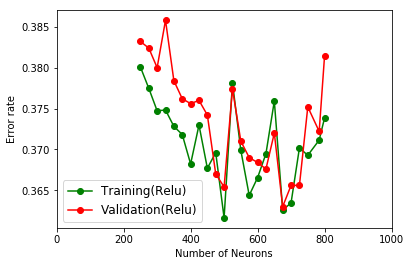

In [43]:
#plt.figure(figsize = (20,16))
plt.plot(Nron_size_list_FR, Train_error_list_FR, 'go-', label = "Training(Relu)")
plt.plot(Nron_size_list_FR, Val_error_list_FR, 'ro-', label = "Validation(Relu)")


plt.xlabel('Number of Neurons')
plt.ylabel('Error rate')
plt.legend( fontsize=12)
plt.xlim(0, 1000)

In [44]:
Nron_opt = Nron_size_list_FR[np.argmin(Val_error_list_FR)]
Nron_opt

675

In [46]:
config = tf.contrib.learn.RunConfig(tf_random_seed=42)
# set the random seed for tensorflow initializers(for consistency between reruns)

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled)
dnn_clf_opt = tf.contrib.learn.DNNClassifier(hidden_units=[Nron_opt], n_classes=10,
                                         feature_columns=feature_columns, config=config)
dnn_clf_opt = tf.contrib.learn.SKCompat(dnn_clf_opt) # if TensorFlow >= 1.1
dnn_clf_opt.fit(X_train_scaled, train_Y, batch_size=64, steps=5500)

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E30C2E4E48>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\DEEPAK\\AppData\\Local\\Temp\\tmprp6ghqvl'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DEEPAK\App

SKCompat()

In [48]:
y_test_pred = dnn_clf_opt.predict(X_test_scaled)
accuracy_score(test_Y, y_test_pred['classes'])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local\Temp\tmprp6ghqvl\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.647

In [49]:
type(y_test_pred['classes'])

numpy.ndarray

In [50]:
print(classification_report(test_Y,y_test_pred['classes']))

              precision    recall  f1-score   support

           0       0.83      0.52      0.64      1014
           1       0.84      0.67      0.75      1014
           2       0.64      0.44      0.53       952
           3       0.47      0.56      0.51      1016
           4       0.59      0.61      0.60       997
           5       0.57      0.51      0.54      1025
           6       0.54      0.78      0.64       980
           7       0.87      0.70      0.77       977
           8       0.75      0.79      0.77      1003
           9       0.61      0.88      0.72      1022

   micro avg       0.65      0.65      0.65     10000
   macro avg       0.67      0.65      0.65     10000
weighted avg       0.67      0.65      0.65     10000



In [51]:
conf_mx_DNN_1L = confusion_matrix(test_Y, y_test_pred['classes'])



row_sum = np.sum(conf_mx_DNN_1L, axis =1, keepdims = True)
norm_conf_mx_DNN_1L = conf_mx_DNN_1L / row_sum
norm_conf_mx_DNN_1L.shape

(10, 10)

[[0.         0.03944773 0.05029586 0.0295858  0.05128205 0.02366864
  0.02071006 0.00690335 0.13905325 0.11637081]
 [0.02071006 0.         0.00197239 0.02465483 0.01577909 0.00295858
  0.04635108 0.00197239 0.02465483 0.1913215 ]
 [0.0210084  0.0052521  0.         0.10189076 0.1355042  0.07773109
  0.14285714 0.01890756 0.02205882 0.03151261]
 [0.00590551 0.00885827 0.03641732 0.         0.03937008 0.15846457
  0.12401575 0.01181102 0.0226378  0.03740157]
 [0.01604814 0.00401204 0.06218656 0.05917753 0.         0.04012036
  0.12838516 0.02006018 0.02106319 0.03610832]
 [0.00195122 0.00390244 0.02439024 0.23707317 0.05170732 0.
  0.11121951 0.02341463 0.01073171 0.02536585]
 [0.00204082 0.00918367 0.02040816 0.09387755 0.03163265 0.03265306
  0.         0.00510204 0.00204082 0.01938776]
 [0.00614125 0.00204708 0.02149437 0.06653019 0.07676561 0.04605937
  0.04401228 0.         0.00511771 0.03582395]
 [0.03090728 0.02392822 0.0109671  0.01495513 0.01395813 0.00697906
  0.0219342  0.00299

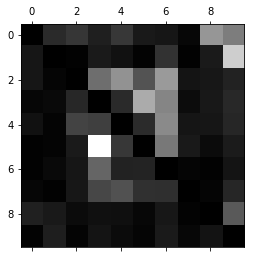

In [52]:
np.fill_diagonal(norm_conf_mx_DNN_1L, 0)
plt.matshow(norm_conf_mx_DNN_1L, cmap = plt.cm.gray)

print(norm_conf_mx_DNN_1L)

In [53]:
config = tf.contrib.learn.RunConfig(tf_random_seed=42)
# set the random seed for tensorflow initializers(for consistency between reruns)

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled)
dnn_clf_opt_W = tf.contrib.learn.DNNClassifier(hidden_units=[Nron_opt], n_classes=10,feature_columns=feature_columns, config=config)
# dnn_clf_opt_W = tf.contrib.learn.SKCompat(dnn_clf_opt_W) #
dnn_clf_opt_W.fit(X_train_scaled, train_Y, batch_size=64, steps=5500)

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E2C0BE9208>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\DEEPAK\\AppData\\Local\\Temp\\tmpnprplixw'}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Ex

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x000001E2C0BE9B70>, 'hidden_units': [675], 'feature_columns': (_RealValuedColumn(column_name='', dimension=3072, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x000001E2956CD1E0>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [54]:
dnn_clf_opt_W.get_variable_names()

['dnn/hiddenlayer_0/biases',
 'dnn/hiddenlayer_0/biases/denlayer_0/biases/part_0/Adagrad',
 'dnn/hiddenlayer_0/weights',
 'dnn/hiddenlayer_0/weights/enlayer_0/weights/part_0/Adagrad',
 'dnn/logits/biases',
 'dnn/logits/biases/dnn/logits/biases/part_0/Adagrad',
 'dnn/logits/weights',
 'dnn/logits/weights/nn/logits/weights/part_0/Adagrad',
 'dnn/multi_class_head/dnn/learning_rate',
 'global_step']

In [55]:
weight_1 = dnn_clf_opt_W.get_variable_value('dnn/hiddenlayer_0/weights')
weight_1.shape

(3072, 675)

In [56]:
weight_out = dnn_clf_opt_W.get_variable_value('dnn/logits/weights')
weight_out.shape

(675, 10)

In [57]:
aa =np.dot(weight_1,weight_out).T
aa.shape

(10, 3072)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

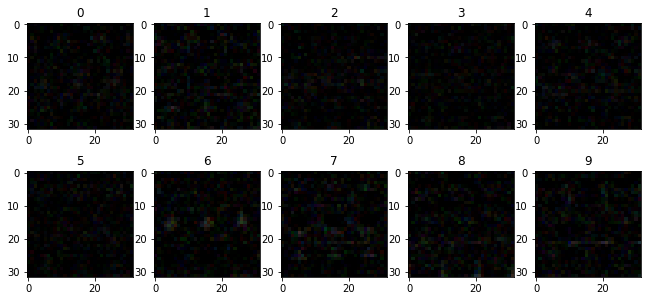

In [59]:
f, axes = plt.subplots(2, 5, figsize=(11,5))
axes = axes.reshape(-1)
for i in range(len(axes)):
    a = axes[i]
    a.imshow(aa[i].reshape(32, 32, 3), cmap=plt.cm.binary)
    a.set_title(i)
    #a.set_xticks(()) # ticks be gone
    #a.set_yticks(())
plt.show()

In [69]:
config = tf.contrib.learn.RunConfig(tf_random_seed=42)
# set the random seed for tensorflow initializers(for consistency between reruns)

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[3072], n_classes=10,feature_columns=feature_columns, config=config)
# dnn_clf = tf.contrib.learn.SKCompat(dnn_clf_opt_W) #
dnn_clf.fit(X_train_scaled, train_Y, batch_size=64, steps=40000)

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E30F8E7908>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\DEEPAK\\AppData\\Local\\Temp\\tmpo8dp3xlf'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DEEPAK\App

INFO:tensorflow:global_step/sec: 14.8565
INFO:tensorflow:loss = 1.2224184, step = 7201 (6.735 sec)
INFO:tensorflow:global_step/sec: 14.9029
INFO:tensorflow:loss = 0.7151902, step = 7301 (6.704 sec)
INFO:tensorflow:global_step/sec: 14.951
INFO:tensorflow:loss = 0.84457016, step = 7401 (6.691 sec)
INFO:tensorflow:global_step/sec: 14.9455
INFO:tensorflow:loss = 0.75257254, step = 7501 (6.693 sec)
INFO:tensorflow:global_step/sec: 14.824
INFO:tensorflow:loss = 1.2413127, step = 7601 (6.742 sec)
INFO:tensorflow:global_step/sec: 14.9635
INFO:tensorflow:loss = 0.93793523, step = 7701 (6.688 sec)
INFO:tensorflow:global_step/sec: 14.8824
INFO:tensorflow:loss = 0.78379214, step = 7801 (6.713 sec)
INFO:tensorflow:global_step/sec: 14.9609
INFO:tensorflow:loss = 0.8660418, step = 7901 (6.688 sec)
INFO:tensorflow:global_step/sec: 14.946
INFO:tensorflow:loss = 0.8752567, step = 8001 (6.691 sec)
INFO:tensorflow:global_step/sec: 14.9689
INFO:tensorflow:loss = 1.2083368, step = 8101 (6.682 sec)
INFO:tens

INFO:tensorflow:global_step/sec: 15.0332
INFO:tensorflow:loss = 0.498782, step = 15301 (6.656 sec)
INFO:tensorflow:global_step/sec: 14.9489
INFO:tensorflow:loss = 0.8201556, step = 15401 (6.687 sec)
INFO:tensorflow:global_step/sec: 14.9983
INFO:tensorflow:loss = 0.7779895, step = 15501 (6.668 sec)
INFO:tensorflow:global_step/sec: 14.987
INFO:tensorflow:loss = 0.5363665, step = 15601 (6.669 sec)
INFO:tensorflow:global_step/sec: 14.9933
INFO:tensorflow:loss = 0.35311365, step = 15701 (6.675 sec)
INFO:tensorflow:global_step/sec: 14.9825
INFO:tensorflow:loss = 0.27784067, step = 15801 (6.671 sec)
INFO:tensorflow:global_step/sec: 14.9747
INFO:tensorflow:loss = 0.46828747, step = 15901 (6.676 sec)
INFO:tensorflow:global_step/sec: 15.0432
INFO:tensorflow:loss = 0.4126137, step = 16001 (6.648 sec)
INFO:tensorflow:global_step/sec: 15.0433
INFO:tensorflow:loss = 0.7226684, step = 16101 (6.651 sec)
INFO:tensorflow:global_step/sec: 15.0828
INFO:tensorflow:loss = 0.38474634, step = 16201 (6.630 sec

INFO:tensorflow:global_step/sec: 15.0055
INFO:tensorflow:loss = 0.44477844, step = 23401 (6.662 sec)
INFO:tensorflow:global_step/sec: 14.9409
INFO:tensorflow:loss = 0.33385774, step = 23501 (6.697 sec)
INFO:tensorflow:global_step/sec: 14.8659
INFO:tensorflow:loss = 0.15351501, step = 23601 (6.726 sec)
INFO:tensorflow:global_step/sec: 14.9758
INFO:tensorflow:loss = 0.19342563, step = 23701 (6.678 sec)
INFO:tensorflow:global_step/sec: 14.9931
INFO:tensorflow:loss = 0.10943404, step = 23801 (6.668 sec)
INFO:tensorflow:global_step/sec: 15.1841
INFO:tensorflow:loss = 0.15428326, step = 23901 (6.589 sec)
INFO:tensorflow:global_step/sec: 14.9042
INFO:tensorflow:loss = 0.17817992, step = 24001 (6.707 sec)
INFO:tensorflow:global_step/sec: 14.9269
INFO:tensorflow:loss = 0.47714913, step = 24101 (6.696 sec)
INFO:tensorflow:global_step/sec: 14.942
INFO:tensorflow:loss = 0.25626448, step = 24201 (6.696 sec)
INFO:tensorflow:global_step/sec: 14.975
INFO:tensorflow:loss = 0.060307316, step = 24301 (6.

INFO:tensorflow:loss = 0.03391997, step = 31401 (6.704 sec)
INFO:tensorflow:global_step/sec: 14.9991
INFO:tensorflow:loss = 0.058462046, step = 31501 (6.672 sec)
INFO:tensorflow:global_step/sec: 14.9825
INFO:tensorflow:loss = 0.07832955, step = 31601 (6.673 sec)
INFO:tensorflow:global_step/sec: 14.9296
INFO:tensorflow:loss = 0.03927978, step = 31701 (6.695 sec)
INFO:tensorflow:global_step/sec: 14.9501
INFO:tensorflow:loss = 0.043304645, step = 31801 (6.688 sec)
INFO:tensorflow:global_step/sec: 14.947
INFO:tensorflow:loss = 0.16266647, step = 31901 (6.694 sec)
INFO:tensorflow:global_step/sec: 14.9222
INFO:tensorflow:loss = 0.06056669, step = 32001 (6.697 sec)
INFO:tensorflow:global_step/sec: 15.0198
INFO:tensorflow:loss = 0.034352906, step = 32101 (6.662 sec)
INFO:tensorflow:global_step/sec: 14.8126
INFO:tensorflow:loss = 0.024734262, step = 32201 (6.747 sec)
INFO:tensorflow:global_step/sec: 14.8789
INFO:tensorflow:loss = 0.19625631, step = 32301 (6.721 sec)
INFO:tensorflow:global_step/

INFO:tensorflow:global_step/sec: 14.8761
INFO:tensorflow:loss = 0.0060229367, step = 39401 (6.723 sec)
INFO:tensorflow:global_step/sec: 14.9331
INFO:tensorflow:loss = 0.0058663175, step = 39501 (6.700 sec)
INFO:tensorflow:global_step/sec: 14.9965
INFO:tensorflow:loss = 0.0039370954, step = 39601 (6.668 sec)
INFO:tensorflow:global_step/sec: 14.9321
INFO:tensorflow:loss = 0.0053432034, step = 39701 (6.693 sec)
INFO:tensorflow:global_step/sec: 14.9881
INFO:tensorflow:loss = 0.0092042, step = 39801 (6.676 sec)
INFO:tensorflow:global_step/sec: 14.9939
INFO:tensorflow:loss = 0.003201607, step = 39901 (6.670 sec)
INFO:tensorflow:Saving checkpoints for 40000 into C:\Users\DEEPAK\AppData\Local\Temp\tmpo8dp3xlf\model.ckpt.
INFO:tensorflow:Loss for final step: 0.0033295918.


DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x000001E2C0B01F98>, 'hidden_units': [3072], 'feature_columns': (_RealValuedColumn(column_name='', dimension=3072, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x000001E2956CD1E0>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [68]:
y_test_pred = dnn_clf_opt.predict(X_test_scaled)
accuracy_score(test_Y, y_test_pred['classes'])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local\Temp\tmprp6ghqvl\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.647

In [62]:
weight_1 = dnn_clf.get_variable_value('dnn/hiddenlayer_0/weights')
weight_1.shape

(3072, 3072)

In [63]:
weight_out = dnn_clf.get_variable_value('dnn/logits/weights')
weight_out.shape

(3072, 10)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

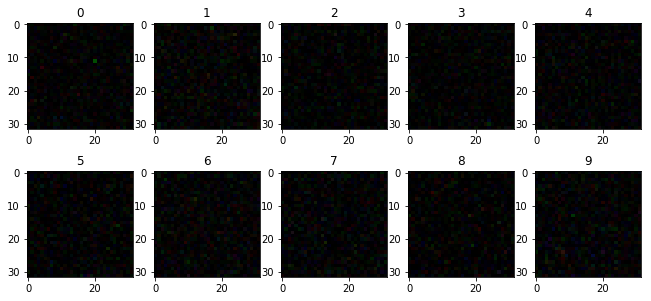

In [65]:
f, axes = plt.subplots(2, 5, figsize=(11,5))
axes = axes.reshape(-1)
for i in range(len(axes)):
    a = axes[i]
    a.imshow(weight_out.T[i].reshape(32, 32, 3), cmap=plt.cm.binary)
    a.set_title(i)
    #a.set_xticks(()) # ticks be gone
    #a.set_yticks(())
plt.show()

In [66]:
xx =np.dot(weight_1,weight_out).T
xx.shape

(10, 3072)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

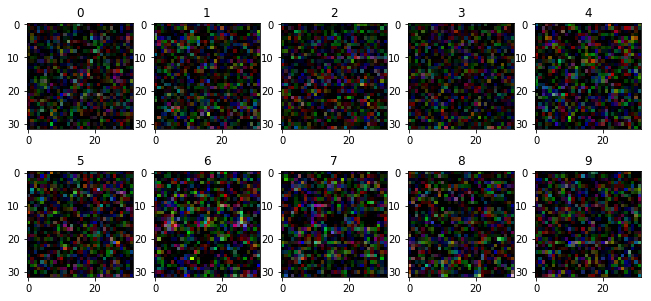

In [67]:
f, axes = plt.subplots(2, 5, figsize=(11,5))
axes = axes.reshape(-1)
for i in range(len(axes)):
    a = axes[i]
    a.imshow(xx[i].T.reshape(32, 32, 3), cmap=plt.cm.binary)
    a.set_title(i)
    
plt.show()